## *Introduction*  

*Research Question:*  
*By which criteria should we classify economies?  
Does division based on GNI per capita levels make sense?*

*Motivation:*
Classifying national economies is a cornerstone of international policy-making, yet the prevailing reliance on gross national income (GNI) per capita as the primary—and often sole - criterion suffers from profound limitations. By distilling a country’s complex economic and social realities into a single monetary average, GNI per capita masks within-group heterogeneity, ignores non-monetary dimensions of well-being, and overlooks structural factors that underpin sustainable growth. For instance, two countries with similar GNI per capita may differ sharply in the health of their populations, the quality of their infrastructure, or the inclusiveness of their educational systems—differences that have direct implications for long-term resilience, social equity, and the effectiveness of policy interventions.

To address these shortcomings, our study develops a development index built on 7 equally weighted thematic dimensions:

1.⁠ ⁠*Income & Output*
   Indicators: GDP, GDP per capita (GDPPC), GNI per capita (GNIPC), GNI per capita at PPP (GNIPCPPP)
   These four metrics collectively capture both the scale of economic activity and its distribution across populations. GDP and GDP per capita measure aggregate and average output, while GNI per capita reflects income actually accruing to residents. Adjusting for purchasing power parity (PPP) with GNIPCPPP accounts for cost-of-living differences, making cross-country comparisons more meaningful. Together, they form the backbone of any development index by quantifying a country’s capacity to generate and sustain material well-being.

2.⁠ ⁠*Infrastructure & Technology*
   Indicators: Industry (including construction) value added (% of GDP), electric power consumption per capita, mobile cellular subscriptions, high-technology exports (% of manufactured exports)
   Physical infrastructure and technological capability are critical enablers of productivity and diversification. The industry share signals the strength of manufacturing and construction sectors; electricity consumption per capita proxies for access to reliable power; and mobile subscriptions indicate the diffusion of basic ICT services. High-technology exports further spotlight a country’s ability to move up the value chain. By combining these variables, we assess the extent to which an economy has built the tangible and digital foundations needed for modern growth.

3.⁠ ⁠*Trade & Investment*
   Indicators: FDI net inflows, exports of goods & services (% of GDP), imports of goods & services (% of GDP), merchandise trade (% of GDP), high-technology exports (% of manufactured exports), gross capital formation (% of GDP)
   Opening to global markets and attracting investment are key drivers of structural transformation. FDI inflows reflect investor confidence and technology transfer; trade ratios reveal a country’s integration into global value chains; and gross capital formation measures domestic investment in assets. Including high-technology exports a second time underscores its dual role as both a technological and trade indicator. This theme captures how external engagement and investment underpin both short-term growth and long-run competitiveness.

4.⁠ ⁠*Human Capital*
   Indicators: Secondary school enrollment (% gross), primary completion rate (%), number of start-up procedures to register a business
   Education and entrepreneurship shape a workforce’s ability to innovate and adapt. Enrollment and completion rates quantify access to and success in formal schooling, which underpin skills development and productivity. The count of procedural steps for business registration reflects institutional support for new ventures, a proxy for the ease with which human capital can be mobilized into economic activity. Together, these measures gauge both the stock of human skills and the environment that allows those skills to translate into enterprise.

5.⁠ ⁠*Environmental*
   Indicators: CO₂ emissions per capita, forest area (sq. km), water productivity (GDP per cubic meter freshwater), value added in agriculture/forestry/fishing (% of GDP)
   Sustainable development requires balancing economic activity with environmental stewardship. CO₂ emissions per capita signal the ecological footprint of industrialization; forest area indicates natural capital endowment and biodiversity; water productivity measures the efficiency of water use in generating GDP; and the share of primary-sector value added reflects dependence on resource-based activities. By integrating these variables, the index accounts for ecological vulnerability and the capacity to manage natural resources responsibly.

6.⁠ ⁠*Institutional Factors*
   Indicators: Military expenditure (% of GDP), total debt service (% of GNI), net ODA received per capita, personal remittances paid, merchandise trade (% of GDP)
   Institutions and external financing shape a country’s policy space and resilience. Military spending reveals fiscal priorities and potential security risks; debt-service ratios capture macroeconomic sustainability; ODA per capita and remittances measure reliance on external transfers; and trade share (again) highlights the institutional frameworks that facilitate exchange. This theme evaluates how governance, financial obligations, and external support systems interact to influence development trajectories.

7.⁠ ⁠*Health*
   Indicators: HIV prevalence (% ages 15–49), under-5 mortality rate, measles immunization coverage (% of children 12–23 months), life expectancy at birth
   Health outcomes both reflect and drive socio-economic progress. HIV prevalence and under-5 mortality identify persistent public-health challenges; immunization rates gauge preventive care coverage; and life expectancy summarizes overall population well-being. By including these metrics, the index captures how effectively countries convert resources into healthy, productive lives—an essential dimension often invisible in income-only classifications.


By weaving together these dimensions, our development index not only positions GNI per capita within a broader developmental context but also tests whether multidimensional measurement can unearth policy‐relevant distinctions—highlighting, for instance, middle-income countries with robust human capital but weak infrastructure, or vice versa—that the GNI classification would obscure.

In [3]:
!pip install jsonlines
!pip install missingno


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
  Using cached missingno-0.5.2-py3-none-any.whl.metadata (639 bytes)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached missingno-0.5.2-py3-none-any.whl (8.7 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
 ================================
# General Libraries
# ================================
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm

# ================================
# Plotting and Visualization
# ================================
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt  
from lets_plot import *
LetsPlot.setup_html()

# ================================
# Statistical Analysis
# ================================
import scipy.stats as stats
from scipy.stats import ttest_ind

# ================================
# Text Analysis and NLP
# ================================
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD

# ================================
# Machine Learning Models
# ================================
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import DBSCAN, KMeans
from sklearn.decomposition import PCA, LatentDirichletAllocation
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier  

# ================================
# Preprocessing and Imputation
# ================================
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# ================================
# Model Selection and Evaluation
# ================================
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    TimeSeriesSplit,
    cross_val_score,
    train_test_split
)

from sklearn.metrics import (
    accuracy_score,
    average_precision_score,
    balanced_accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    mean_absolute_error,
    mean_squared_error,
    precision_score,
    recall_score,
    r2_score,
    roc_auc_score,
    silhouette_score
)

from sklearn.inspection import permutation_importance

# ================================
# Data Sources
# ================================
import wbgapi as wb

In [188]:
data = pd.read_csv('wdi_data.csv')

In [19]:
data = pd.read_csv('../group8_final_project_ds202w/Data/data.csv', engine='python')

In [189]:

# List of indicators
indicators = [
    'ag_lnd_frst_k2', 'ag_srf_totl_k2', 'bm_trf_pwkr_cd_dt', 'bn_klt_dinv_cd',
    'bx_klt_dinv_cd_wd', 'cm_mkt_lcap_gd_zs', 'dt_dod_dect_cd', 'dt_oda_odat_pc_zs',
    'dt_tds_dect_gn_zs', 'eg_use_elec_kh_pc', 'eg_use_pcap_kg_oe', 'en_atm_co2e_pc',
    'er_gdp_fwtl_m3_kd', 'fp_cpi_totl_zg', 'gc_rev_xgrt_gd_zs', 'ic_reg_proc', 'it_cel_sets_p2',
    'ms_mil_xpnd_gd_zs', 'ne_exp_gnfs_zs', 'ne_gdi_totl_zs', 'ne_imp_gnfs_zs', 'nv_agr_totl_zs',
    'nv_ind_totl_zs', 'ny_gdp_defl_kd_zg', 'ny_gdp_mktp_cd', 'ny_gdp_mktp_kd_zg', 'ny_gdp_pcap_cd',
    'ny_gnp_atls_cd', 'ny_gnp_mktp_pp_cd', 'ny_gnp_pcap_cd', 'ny_gnp_pcap_pp_cd', 'se_enr_prsc_fm_zs',
    'se_prm_cmpt_zs', 'se_sec_enrr', 'sh_dyn_aids_zs', 'sh_dyn_mort', 'sh_imm_meas', 'sh_sta_brtc_zs',
    'sh_sta_maln_zs', 'si_dst_frst_20', 'si_pov_nahc', 'sm_pop_netm', 'sp_ado_tfrt', 'sp_dyn_conu_zs',
    'sp_dyn_le00_in', 'sp_dyn_tfrt_in', 'sp_pop_grow', 'sp_pop_totl', 'tg_val_totl_gd_zs', 'tt_pri_mrch_xd_wd',
    'tx_val_tech_mf_zs'
]

# Helper function to standardize column names (convert to uppercase and replace underscores)
def standardize_column_name(col):
    return col.upper().replace('_', '.')

# Fetch indicator name from the metadata URL
def get_indicator_name(code):
    url = f'https://databank.worldbank.org/metadataglossary/world-development-indicators/series/{code}'
    response = requests.get(url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        label_elements = soup.find_all(['td', 'div', 'span'])
        
        for i, tag in enumerate(label_elements):
            if tag.get_text(strip=True) == "Indicator Name":
                try:
                    next_tag = label_elements[i + 1]
                    return next_tag.get_text(strip=True)
                except IndexError:
                    return None  # Return None if the next tag is missing
    return None

# Create a dictionary for indicator code to name mapping
indicator_names = {}
for code in indicators:
    standardized_code = standardize_column_name(code)  # Standardize the code to match metadata format
    indicator_name = get_indicator_name(standardized_code)
    indicator_names[standardized_code] = indicator_name if indicator_name else standardized_code

# Now, assuming 'data' is your dataframe, we rename the columns
column_mapping = {col: col for col in data.columns[:3]}  # Keep the first three columns unchanged

# Map the remaining columns
for col in data.columns[3:]:
    standardized_col = standardize_column_name(col)  # Standardize the column name to match keys in indicator_names
    column_mapping[col] = indicator_names.get(standardized_col, col)  # Map to indicator name if found, else keep original

# Rename the columns in the dataframe
data.rename(columns=column_mapping, inplace=True)

# Print renamed dataframe columns
print(data.columns)


Index(['Unnamed: 0', 'country_code', 'year', 'Forest area (sq. km)',
       'Surface area (sq. km)', 'Personal remittances, paid (current US$)',
       'BN.KLT.DINV.CD',
       'Foreign direct investment, net inflows (BoP, current US$)',
       'Market capitalization of listed domestic companies (% of GDP)',
       'DT.DOD.DECT.CD', 'Net ODA received per capita (current US$)',
       'Total debt service (% of GNI)',
       'Electric power consumption (kWh per capita)',
       'Energy use (kg of oil equivalent per capita)',
       'CO2 emissions (metric tons per capita)',
       'Water productivity, total (constant 2015 US$ GDP per cubic meter of total freshwater withdrawal)',
       'Inflation, consumer prices (annual %)',
       'Revenue, excluding grants (% of GDP)',
       'Start-up procedures to register a business (number)',
       'Mobile cellular subscriptions (per 100 people)',
       'Military expenditure (% of GDP)',
       'Exports of goods and services (% of GDP)',
       '

In [190]:
#RENAMING THE COLUMNS THAT DONT GET SCRAPED FOR THEIR NAME EG NY.... (THIS IS THE GDP/GNI STUFF)

# Dictionary mapping old column names to their descriptive equivalents
rename_dict = {
    'BN.KLT.DINV.CD': 'Foreign direct investment, net (BoP, current US$)',
    'DT.DOD.DECT.CD': 'External debt stocks, total (DOD, current US$)',
    'NY.GDP.MKTP.CD': 'GDP',
    'NY.GDP.PCAP.CD': 'GDPPC',
    'NY.GNP.ATLS.CD': 'GNI',
    'NY.GNP.MKTP.PP.CD': 'GNIPPP',
    'NY.GNP.PCAP.CD': 'GNIPC',
    'NY.GNP.PCAP.PP.CD': 'GNIPCPPP'
}
#WILL COME IN HANDY FOR FUTURE UNSUPERVISED LEARNING TO HAVE THESE TOGETHER
g_columns = ['GDP', 'GDPPC', 'GNI', 'GNIPPP', 'GNIPC', 'GNIPCPPP']

# Apply renaming
data.rename(columns=rename_dict, inplace=True)
data.drop(columns='Unnamed: 0', inplace=True)

**Data cleaning**

year
2000    27.16
2001    28.27
2002    27.41
2003    25.94
2004    24.81
2005    23.85
2006    23.40
2007    22.91
2008    22.71
2009    22.11
2010    21.48
2011    21.19
2012    21.05
2013    21.16
2014    20.36
2015    22.82
dtype: float64


/var/folders/4p/6jzhm7d56qx6sk6z2n0187f80000gn/T/ipykernel_94736/3423375166.py:4: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



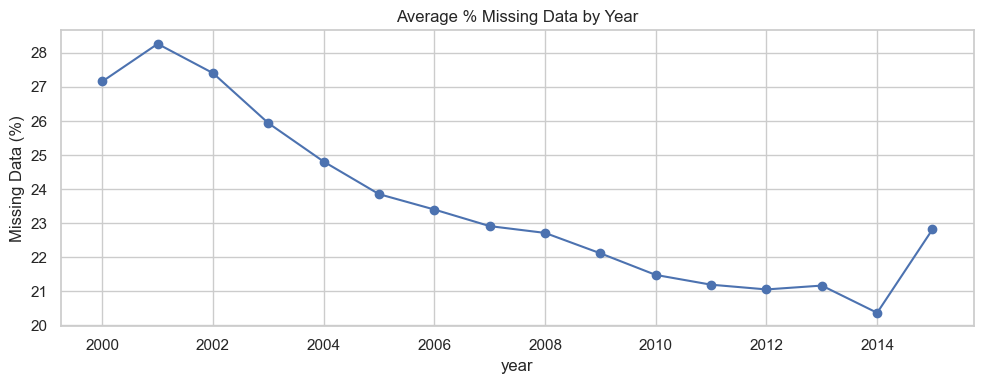

In [191]:


# Group by year and compute the average % missing per year
missing_by_year = (
    data.groupby("year")
      .apply(lambda g: g.isna().mean().mean() * 100)  # % of missing values across all cols
)

# Show the results
print(missing_by_year.round(2))

# Optional: Plot it
missing_by_year.plot(marker='o', figsize=(10, 4), title="Average % Missing Data by Year")
plt.ylabel("Missing Data (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/4p/6jzhm7d56qx6sk6z2n0187f80000gn/T/ipykernel_94736/3365388691.py:4: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



  country_code  Missing %
0          MAF      82.43
1          CHI      78.42
2          GIB      73.00
3          SXM      72.29
4          MNP      70.99
5          ASM      70.99
6          VIR      70.52
7          VGB      68.99
8          MCO      68.87
9          IMN      68.63


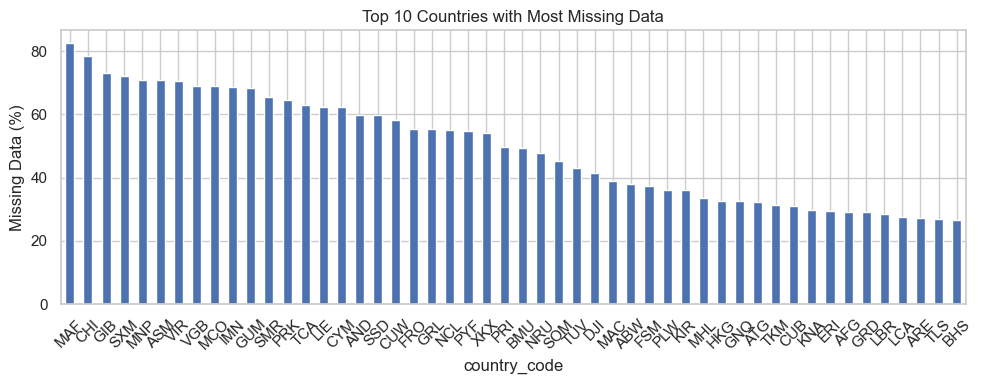

In [192]:
# Group by 'country_code' and calculate average missing percentage
missing_by_country = (
    data.groupby("country_code")
        .apply(lambda g: g.isna().mean().mean() * 100)
        .sort_values(ascending=False)
        .round(2)
        .reset_index(name="Missing %")
)

# View top 10 countries with most missing data
print(missing_by_country.head(10))
# Optional: Plot the top 50 countries with most missing data    
missing_by_country.head(50).plot(
    x="country_code", y="Missing %", kind="bar", legend=False, figsize=(10, 4), title="Top 10 Countries with Most Missing Data"
)
plt.ylabel("Missing Data (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

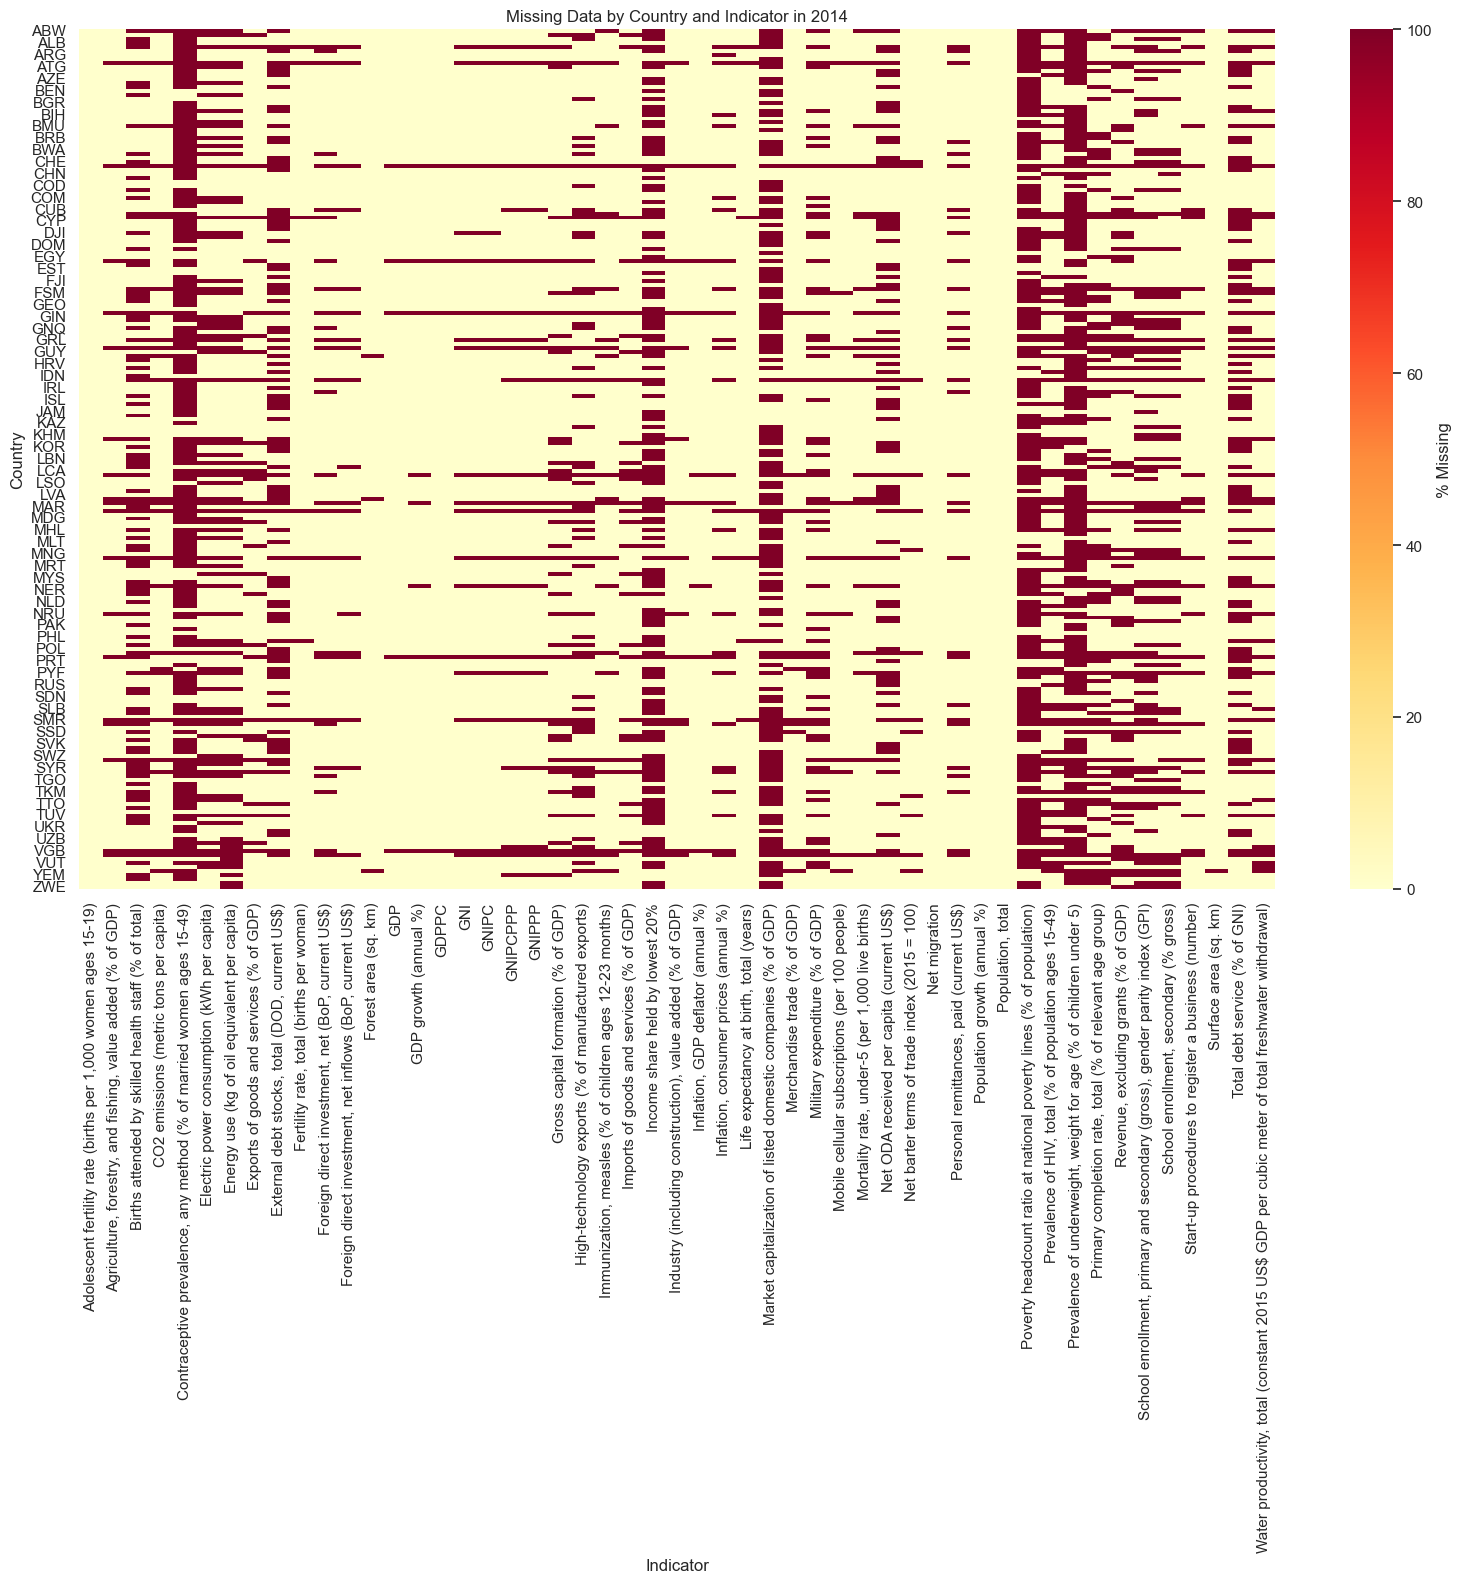

In [193]:


# Filter for the specific year (e.g., 2014)
year = 2014
data_year = data[data['year'] == year]

# Extract indicator columns only (exclude 'year' and 'country_code')
indicator_cols = data_year.columns.difference(['year', 'country_code'])

# Calculate % missing data per indicator per country
missing_matrix = data_year[indicator_cols].isna().groupby(data_year['country_code']).mean() * 100

# Plot the heatmap
plt.figure(figsize=(16, 16))
sns.heatmap(missing_matrix, cmap="YlOrRd", cbar_kws={'label': '% Missing'})
plt.title(f"Missing Data by Country and Indicator in {year}")
plt.xlabel("Indicator")
plt.ylabel("Country")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
# # For each country, missing data by indicator in 2014 (can be used for explaining weird results in later analysis)
# !pip install ace_tools_open
# import ace_tools_open as tools

# # Calculate % missing data per column (indicator) per country
# missing_by_country_indicator = data_year.groupby('country_code').apply(lambda g: g[indicator_cols].isna().mean() * 100)

# # Display the table to the user
# tools.display_dataframe_to_user(name="Missing Data by Indicator per Country in 2014", dataframe=missing_by_country_indicator.round(1))


# #Initialize a dictionary to store missing data percentages by sector
# missing_data_by_sector = {}

# # Iterate through each sector and calculate missing percentages
# for sector, indicators in sectors.items():
#     # Filter to only include the selected indicators for each sector
#     available_indicators = [col for col in indicators if col in data_year.columns]
    
#     # Calculate missing percentage by country for each indicator in the sector
#     if available_indicators:
#         missing_data_by_country = data_year[available_indicators].isna().groupby(data_year['country_code']).mean() * 100
#         missing_data_by_sector[sector] = missing_data_by_country

# # Combine into a single DataFrame for display
# missing_data_combined = pd.concat(missing_data_by_sector, axis=1)

# # Display the combined DataFrame
# tools.display_dataframe_to_user(name="Missing Data by Country and Theme Indicators in 2014", dataframe=missing_data_combined.round(1))



Most Important Features:
                                              Feature  Importance
39  Agriculture, forestry, and fishing, value adde...    0.112673
29    Mortality rate, under-5 (per 1,000 live births)    0.092613
19            Life expectancy at birth, total (years)    0.080919
12        Electric power consumption (kWh per capita)    0.061651
5   Adolescent fertility rate (births per 1,000 wo...    0.048126
35                      Total debt service (% of GNI)    0.041617
30                       Population growth (annual %)    0.039925
10       Energy use (kg of oil equivalent per capita)    0.039156
27     Mobile cellular subscriptions (per 100 people)    0.032564
24  Water productivity, total (constant 2015 US$ G...    0.027681

Classification Report:
                     precision    recall  f1-score   support

        High income       1.00      1.00      1.00        13
         Low income       1.00      0.80      0.89         5
Lower middle income       0.78      0.64

/var/folders/4p/6jzhm7d56qx6sk6z2n0187f80000gn/T/ipykernel_94736/69017443.py:98: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.



<Figure size 1200x800 with 0 Axes>

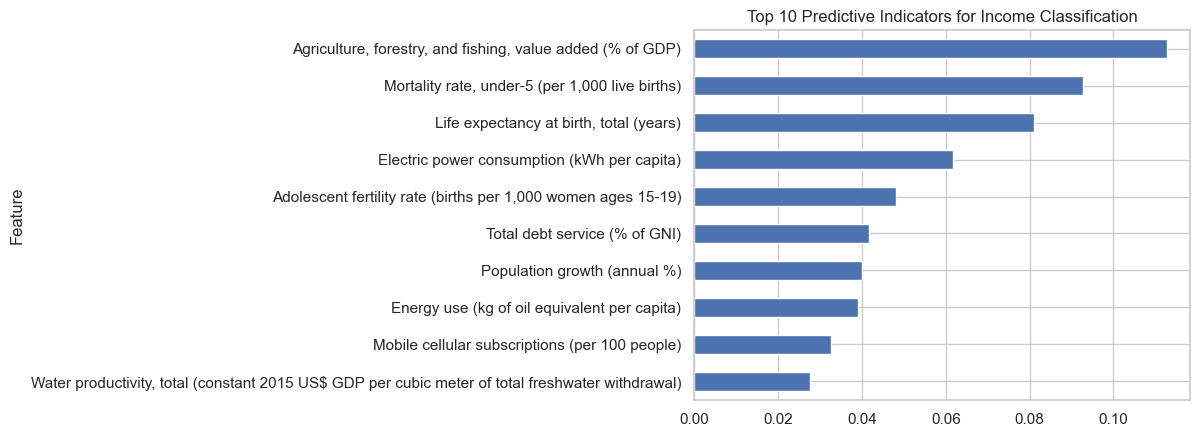

In [194]:
# import pandas as pd
# import numpy as np
# import requests
# from bs4 import BeautifulSoup
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.impute import SimpleImputer
# from sklearn.pipeline import make_pipeline
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans
# import seaborn as sns
# from sklearn.inspection import permutation_importance
# from sklearn.cluster import KMeans
# import seaborn as sns

# --------------------------
# Define 2014 income group thresholds (GNI per capita, PPP)
income_bins = [0, 1045, 4125, 12735, float('inf')]
income_labels = ['Low income', 'Lower middle income', 'Upper middle income', 'High income']

# --------------------------
# Filter and preprocess 2014 data
data_2014 = data[data['year'] == 2014].copy()
data_2014['income_group'] = pd.cut(
    data_2014['GNIPC'],
    bins=income_bins,
    labels=income_labels
)
data_2014 = data_2014.dropna(subset=['income_group']).reset_index(drop=True)

# Feature selection
exclude_cols = ['year', 'income_group', [col for col in g_columns]]
features = [col for col in data_2014.columns
            if col not in exclude_cols and pd.api.types.is_numeric_dtype(data_2014[col])]

X = data_2014[features]
y = data_2014['income_group']

# --------------------------
# Preprocessing and modeling
preprocessor = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)
X_processed = preprocessor.fit_transform(X)

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_processed)

loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=features
)

top_features = []
for pc in loadings.columns:
    sorted_loadings = loadings[pc].abs().sort_values(ascending=False)
    top_features.extend(sorted_loadings[:3].index.tolist())
top_features = list(set(top_features))

X_selected = pd.DataFrame(X_processed, columns=features)[top_features]

X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

model = RandomForestClassifier(n_estimators=200,
                               class_weight='balanced',
                               random_state=42)
model.fit(X_train, y_train)

feature_importance = pd.DataFrame({
    'Feature': top_features,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

# --------------------------
# Results and visualization
print("\nMost Important Features:")
print(feature_importance.head(10))

print("\nClassification Report:")
print(classification_report(y_test, model.predict(X_test)))

plt.figure(figsize=(12, 8))
feature_importance.head(10).sort_values('Importance').plot.barh(
    x='Feature', y='Importance',
    title='Top 10 Predictive Indicators for Income Classification',
    legend=False
)
plt.tight_layout()
plt.show()

Clustering based on top PCA features (excluding GNI): ['Surface area (sq. km)', 'GNI', 'Personal remittances, paid (current US$)', 'High-technology exports (% of manufactured exports)', 'Prevalence of HIV, total (% of population ages 15-49)', 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'GDP growth (annual %)', 'GDP', 'Industry (including construction), value added (% of GDP)', 'Inflation, GDP deflator (annual %)', 'Energy use (kg of oil equivalent per capita)', 'School enrollment, secondary (% gross)', 'Electric power consumption (kWh per capita)', 'Revenue, excluding grants (% of GDP)', 'School enrollment, primary and secondary (gross), gender parity index (GPI)', 'Market capitalization of listed domestic companies (% of GDP)', 'Imports of goods and services (% of GDP)', 'Military expenditure (% of GDP)', 'Poverty headcount ratio at national poverty lines (% of population)', 'Life expectancy at birth, total (years)', 'Merchandise trade (% of GDP)', 'Inflation, con

/var/folders/4p/6jzhm7d56qx6sk6z2n0187f80000gn/T/ipykernel_94736/1460499644.py:40: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/4p/6jzhm7d56qx6sk6z2n0187f80000gn/T/ipykernel_94736/1460499644.py:48: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




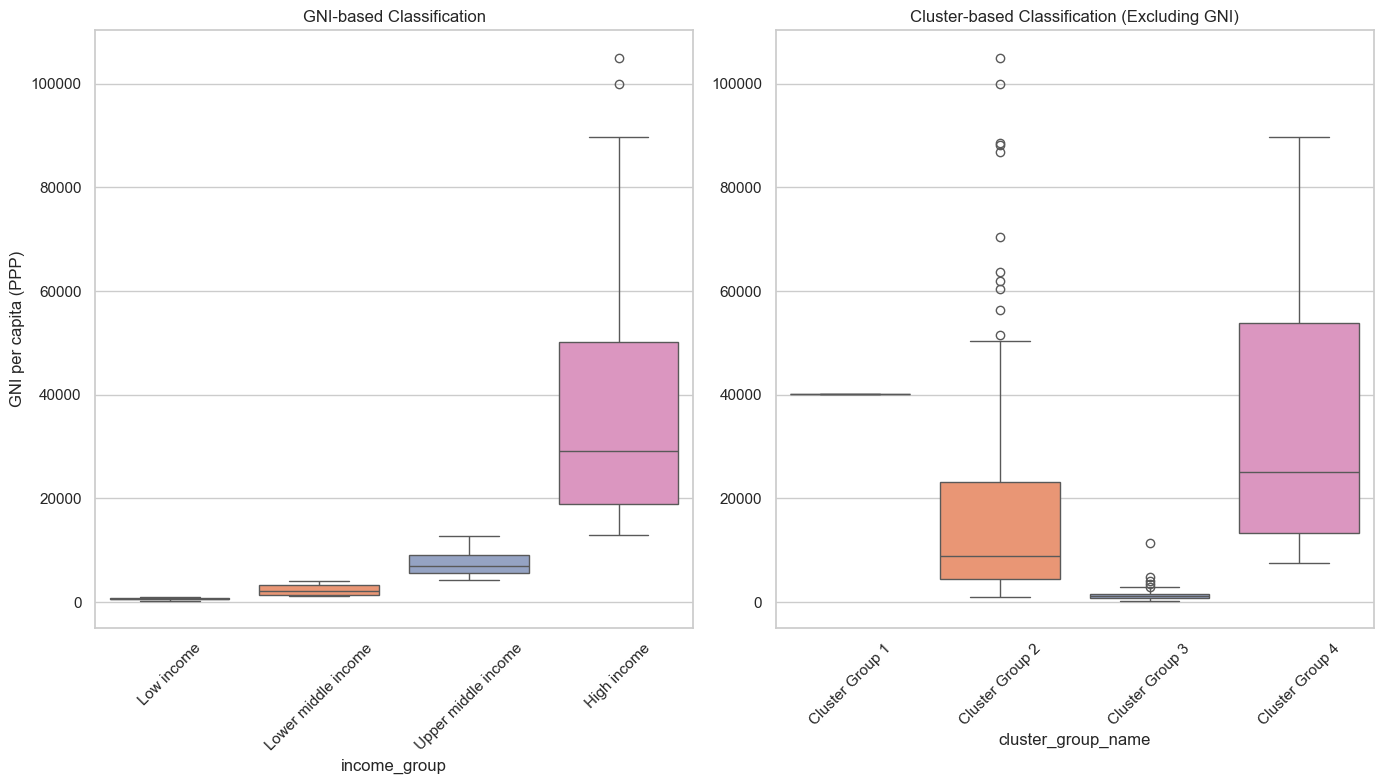

In [195]:
# Use the cleaned and prepared 2014 dataset
data = data_2014.copy()

# --------------------------
# CLUSTERING (EXCLUDING GNI)
# --------------------------

# Define the GNI column to exclude


# Exclude GNI from top PCA features
filtered_features = [f for f in top_features if f != g_columns]
print("Clustering based on top PCA features (excluding GNI):", filtered_features)

# Prepare data for clustering
X_cluster = pd.DataFrame(X_processed, columns=features)[filtered_features].copy()

# Reprocess for clustering
cluster_preprocessor = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)
X_cluster_processed = cluster_preprocessor.fit_transform(X_cluster)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
data['cluster_group'] = kmeans.fit_predict(X_cluster_processed)

# Label clusters descriptively
data['cluster_group_name'] = data['cluster_group'].apply(lambda x: f'Cluster Group {x+1}')

# --------------------------
# COMPARISON VISUALIZATION
# --------------------------

plt.figure(figsize=(14, 8))

# Income group boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='income_group', y= 'GNIPC', data=data,
            order=income_labels, palette='Set2')
plt.title('GNI-based Classification')
plt.xticks(rotation=45)
plt.ylabel('GNI per capita (PPP)')

# Cluster group boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x='cluster_group_name', y= 'GNIPC', data=data,
            order=[f'Cluster Group {i+1}' for i in range(4)],
            palette='Set2')
plt.title('Cluster-based Classification (Excluding GNI)')
plt.xticks(rotation=45)
plt.ylabel('')

plt.tight_layout()
plt.show()


Clustering based on top PCA features (excluding GNI and the likes): ['Surface area (sq. km)', 'Personal remittances, paid (current US$)', 'High-technology exports (% of manufactured exports)', 'Prevalence of HIV, total (% of population ages 15-49)', 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'GDP growth (annual %)', 'Industry (including construction), value added (% of GDP)', 'Inflation, GDP deflator (annual %)', 'Energy use (kg of oil equivalent per capita)', 'School enrollment, secondary (% gross)', 'Electric power consumption (kWh per capita)', 'Revenue, excluding grants (% of GDP)', 'School enrollment, primary and secondary (gross), gender parity index (GPI)', 'Market capitalization of listed domestic companies (% of GDP)', 'Imports of goods and services (% of GDP)', 'Military expenditure (% of GDP)', 'Poverty headcount ratio at national poverty lines (% of population)', 'Life expectancy at birth, total (years)', 'Merchandise trade (% of GDP)', 'Inflation, con

/var/folders/4p/6jzhm7d56qx6sk6z2n0187f80000gn/T/ipykernel_94736/1038734203.py:62: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




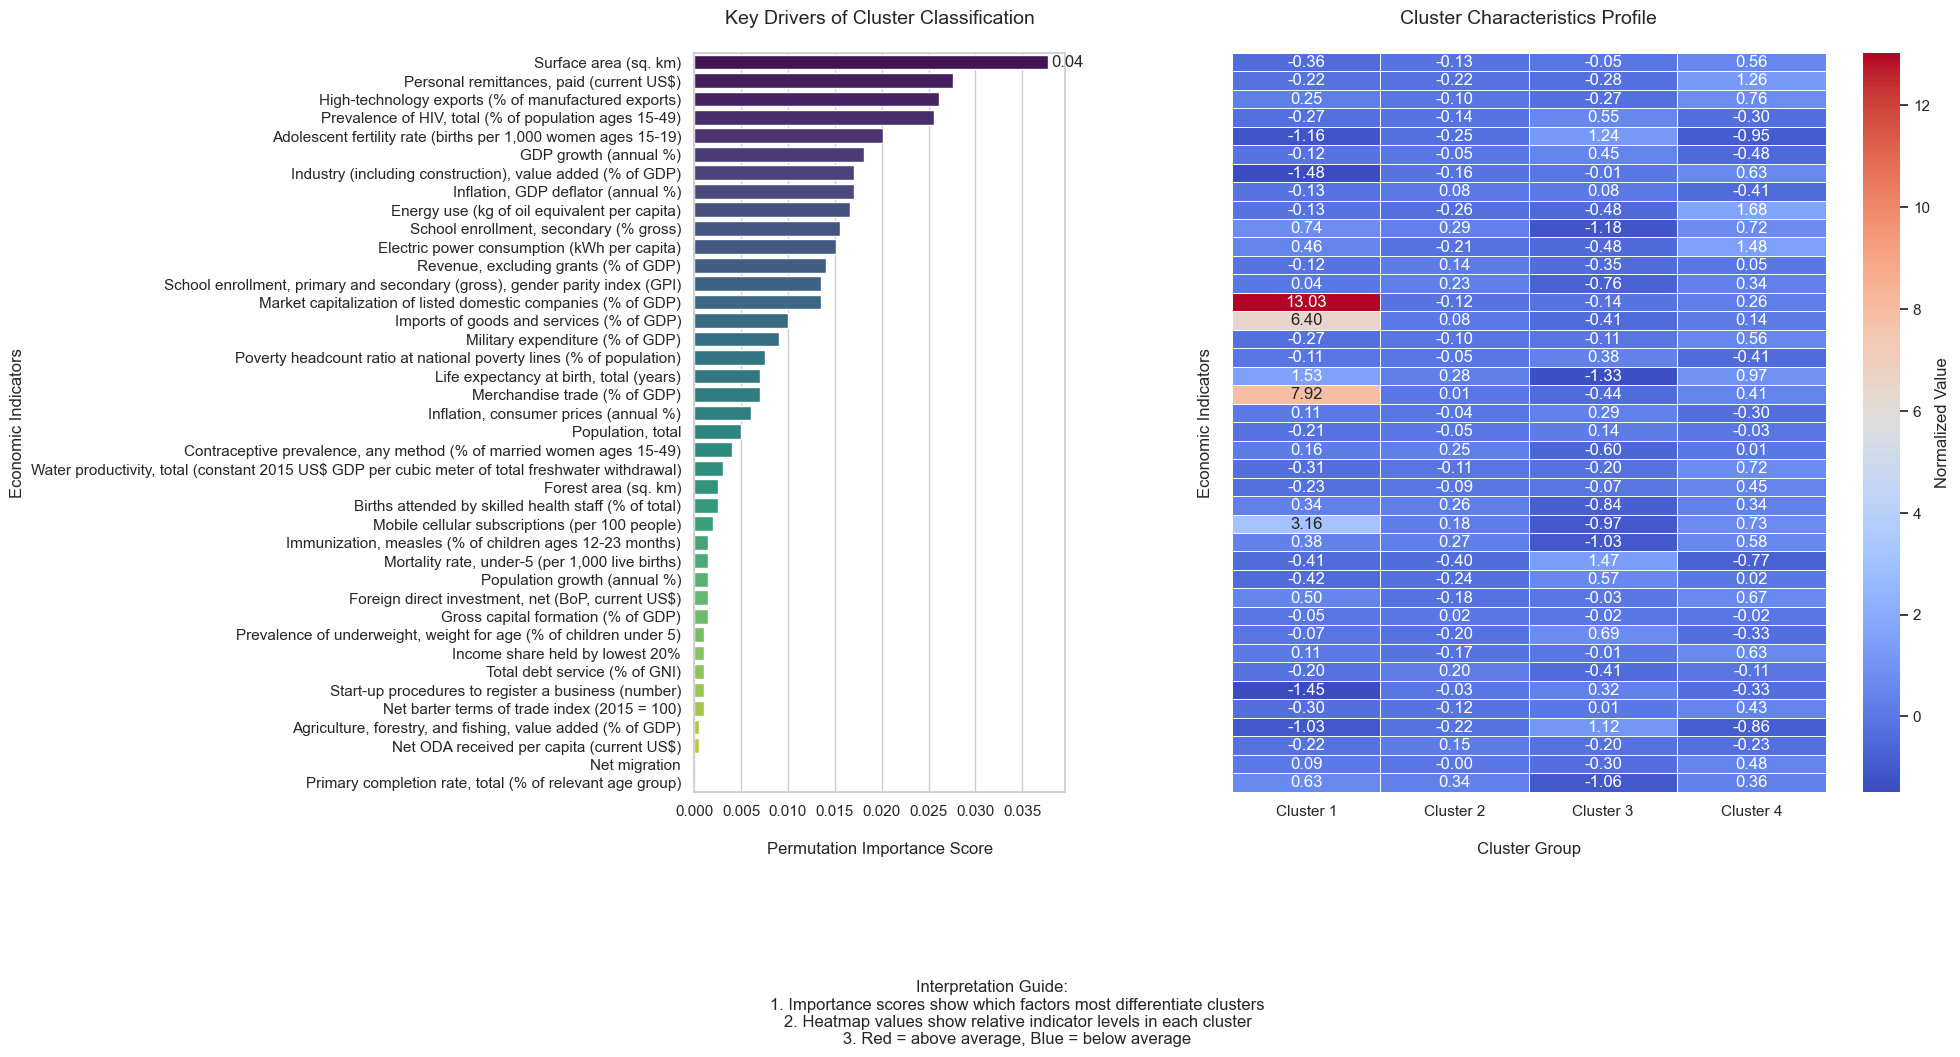

In [196]:
# Use the processed 2014 data
data = data_2014.copy()

# --------------------------
# CLUSTERING (EXCLUDING GNI)
# --------------------------

filtered_features = [f for f in top_features if f not in g_columns]
print("Clustering based on top PCA features (excluding GNI and the likes):", filtered_features)

# Prepare and process data for clustering
X_cluster = pd.DataFrame(X_processed, columns=features)[filtered_features].copy()
cluster_preprocessor = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())
X_cluster_processed = cluster_preprocessor.fit_transform(X_cluster)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
data['cluster_group'] = kmeans.fit_predict(X_cluster_processed)
data['cluster_group_name'] = data['cluster_group'].apply(lambda x: f'Cluster Group {x+1}')

# --------------------------
# COMPUTE CLUSTER DRIVERS
# --------------------------
perm_importance = permutation_importance(
    kmeans, X_cluster_processed, data['cluster_group'],
    scoring='accuracy', n_repeats=10, random_state=42, n_jobs=-1
)

# Organize importance into DataFrame
cluster_drivers = pd.DataFrame({
    'Feature': filtered_features,
    'Importance': perm_importance.importances_mean
}).sort_values('Importance', ascending=False)

# Cluster centers (normalized feature values)
cluster_centers = kmeans.cluster_centers_
cluster_centers_normalized = pd.DataFrame(
    cluster_centers, columns=filtered_features
).T
cluster_centers_normalized.columns = [f'Cluster {i+1}' for i in range(cluster_centers.shape[0])]

# --------------------------
# RENAME FEATURES FOR DISPLAY
# --------------------------
# Use existing column_mapping if available
if 'column_mapping' in globals():
    reverse_map = {v: v for v in filtered_features}
    reverse_map.update(column_mapping)
    renamed_features = [reverse_map.get(f, f) for f in filtered_features]
else:
    renamed_features = filtered_features  # Fallback

cluster_drivers['Feature'] = renamed_features
cluster_centers_normalized.index = renamed_features

# --------------------------
# VISUALIZATION
# --------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), gridspec_kw={'width_ratios': [1, 2]})

# Permutation Importance Bar Plot
sns.barplot(x='Importance', y='Feature', data=cluster_drivers,
            palette='viridis', ax=ax1)
ax1.set_title('Key Drivers of Cluster Classification\n', fontsize=14)
ax1.set_xlabel('\nPermutation Importance Score', fontsize=12)
ax1.set_ylabel('Economic Indicators', fontsize=12)
ax1.bar_label(ax1.containers[0], fmt='%.2f', padding=3)

# Cluster Profile Heatmap
sns.heatmap(cluster_centers_normalized, annot=True, cmap='coolwarm',
            fmt=".2f", linewidths=.5, ax=ax2, cbar_kws={'label': 'Normalized Value'})
ax2.set_title('Cluster Characteristics Profile\n', fontsize=14)
ax2.set_xlabel('\nCluster Group', fontsize=12)
ax2.set_ylabel('Economic Indicators', fontsize=12)
ax2.set_yticklabels([])  # Hide vertical labels

# Interpretation Note
plt.figtext(0.5, -0.05,
           """Interpretation Guide:
           1. Importance scores show which factors most differentiate clusters
           2. Heatmap values show relative indicator levels in each cluster
           3. Red = above average, Blue = below average""",
           ha='center', fontsize=12, wrap=True)

plt.tight_layout()
plt.subplots_adjust(bottom=0.2, wspace=0.3)
plt.show()

Initial data exploration and clustering driver results show that while direct economic indicators like GDP and GNI are strong predictors, health, infrastructure, and demographic indicators also carry substantial predictive value. This reflects the multidimensional nature of development and justifies the use of themes in the future sections. Some impactful features include agriculutre value added, mortality rate under 5, life expectancy at birth, electric power consumption etc. These indicators suggest that using data apart from GNI can effectively capture complex socioeconomic dimensions such as financial market development, public health, demographic trends, and government spending priorities.

In terms of initial analysis, I think this is a good start. We have identified 5 themes outisde of GNI that are important for measuring the dimensions of an economy. The themes are:
1. Income and Output
2. Infrastructure and Technology
3. Trade and Investment
4. Human Capital
5. Institution Factors
6. Health

In order to explore these themes and to see how we should scale them accordinly, we need to standardize them to see how they compare to each other. We can scale them using Standard Scaler and compare them accordinly

**Themes**

In [217]:
theme_mapping = {
    'Income & Output': ['GDP', 'GDPPC', 'GNIPC', 'GNIPCPPP'],
    
    'Infrastructure & Technology': [
        'Industry (including construction), value added (% of GDP)',
        'Electric power consumption (kWh per capita)',
        'Mobile cellular subscriptions (per 100 people)',
        'High-technology exports (% of manufactured exports)'
    ],
    
    'Trade & Investment': [
        'Foreign direct investment, net inflows (BoP, current US$)',
        'Exports of goods and services (% of GDP)',
        'Imports of goods and services (% of GDP)',
        'Merchandise trade (% of GDP)',
        'High-technology exports (% of manufactured exports)',
        'Gross capital formation (% of GDP)'
    ],
    
    'Human Capital': [
        'School enrollment, secondary (% gross)',
        'Primary completion rate, total (% of relevant age group)',
        'Start-up procedures to register a business (number)'
    ],
    
    'Environmental': [
        'CO2 emissions (metric tons per capita)',
        'Forest area (sq. km)',
        'Water productivity, total (constant 2015 US$ GDP per cubic meter of total freshwater withdrawal)',
        'Agriculture, forestry, and fishing, value added (% of GDP)'
    ],
    
    'Institutional Factors': [
        'Military expenditure (% of GDP)',
        'Total debt service (% of GNI)',
        'Net ODA received per capita (current US$)',
        'Personal remittances, paid (current US$)',
        'Merchandise trade (% of GDP)'
    ],

    'Health': [
        'Prevalence of HIV, total (% of population ages 15-49)',
        'Mortality rate, under-5 (per 1,000 live births)',
        'Immunization, measles (% of children ages 12-23 months)',
        'Life expectancy at birth, total (years)'
    ]
}


In [218]:
all_theme_vars = [item for sublist in theme_mapping.values() for item in sublist]

# See which are missing or mismatched
unmatched = [col for col in data_2014.columns if col not in all_theme_vars and col not in ['country', 'country_code', 'year']]
print("Variables not assigned to themes yet:\n", unmatched)

Variables not assigned to themes yet:
 ['Surface area (sq. km)', 'Foreign direct investment, net (BoP, current US$)', 'Market capitalization of listed domestic companies (% of GDP)', 'External debt stocks, total (DOD, current US$)', 'Energy use (kg of oil equivalent per capita)', 'Inflation, consumer prices (annual %)', 'Revenue, excluding grants (% of GDP)', 'Inflation, GDP deflator (annual %)', 'GDP growth (annual %)', 'GNI', 'GNIPPP', 'School enrollment, primary and secondary (gross), gender parity index (GPI)', 'Births attended by skilled health staff (% of total)', 'Prevalence of underweight, weight for age (% of children under 5)', 'Income share held by lowest 20%', 'Poverty headcount ratio at national poverty lines (% of population)', 'Net migration', 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'Contraceptive prevalence, any method (% of married women ages 15-49)', 'Fertility rate, total (births per woman)', 'Population growth (annual %)', 'Population, total

In [219]:
# Drop high-missing columns
high_missing_cols = [
    'Electric power consumption (kWh per capita)',
    'Energy use (kg of oil equivalent per capita)',
    'Prevalence of underweight, weight for age (% of children under 5)',
    'Contraceptive prevalence, any method (% of married women ages 15-49)'
]

data_2014_c = data_2014.drop(columns=high_missing_cols, errors='ignore')

In [220]:
standardized_df_14 = data_2014_c.copy()
scaler = StandardScaler()

for theme, cols in theme_mapping.items():
    valid_cols = [col for col in cols if col in data_2014_c.columns]
    standardized_df_14[valid_cols] = scaler.fit_transform(data_2014_c[valid_cols])


In [221]:
# list of negative indicators
bad_list=['Mortality rate, under-5 (per 1,000 live births)',
        'Prevalence of HIV, total (% of population ages 15-49)',
        'Adolescent fertility rate (births per 1,000 women ages 15-19)',
        'Start-up procedures to register a business (number)',
        'Total debt service (% of GNI)']

# Invert the direction of 'bad' indicators (higher = worse → higher = better after flipping)
for col in bad_list:
    standardized_df_14[col] = -standardized_df_14[col]

#Mapping the z-score standardisation function
for theme, cols in theme_mapping.items():
    valid_cols = [col for col in cols if col in standardized_df_14.columns]
    standardized_df_14[f'{theme}_Score'] = standardized_df_14[valid_cols].mean(axis=1)

In [222]:
theme_score_cols = [col for col in standardized_df_14.columns if col.endswith('_Score')]
standardized_df_14[theme_score_cols + ['country_code']].head(10)

,Income & Output_Score,Infrastructure & Technology_Score,Trade & Investment_Score,Human Capital_Score,Environmental_Score,Institutional Factors_Score,Health_Score,country_code
0,0.355286,-0.224246,0.259991,0.896827,-0.650361,-0.280763,0.501368,ABW
1,-0.611938,-0.795185,-0.477127,-0.039360,-0.080651,-0.109657,-1.030957,AFG
2,-0.434471,0.120153,-0.069362,-0.087896,0.030843,0.151603,-1.415656,AGO
3,-0.417444,-0.315553,-0.293610,0.943135,-0.046629,-0.231059,0.671227,ALB
4,1.393382,1.390514,0.696871,0.942507,0.610648,1.967944,0.724901,ARE
5,-0.065517,0.184497,-0.750533,-0.089410,-0.159289,-0.402965,0.529596,ARG
6,-0.436991,-0.106727,-0.369799,0.413683,-0.102217,-0.194693,0.472634,ARM
7,-0.072723,-0.333150,-0.005347,0.827339,0.188784,-0.398050,0.604620,ATG
8,1.572924,0.283110,0.032625,1.417725,0.728739,-0.077491,0.760702,AUS
9,1.150605,0.542147,0.150628,0.274425,-0.073788,0.041878,0.903101,AUT


___

We can have a brief exploration about how countries face against each other in numerous metrics and see whether this lines up


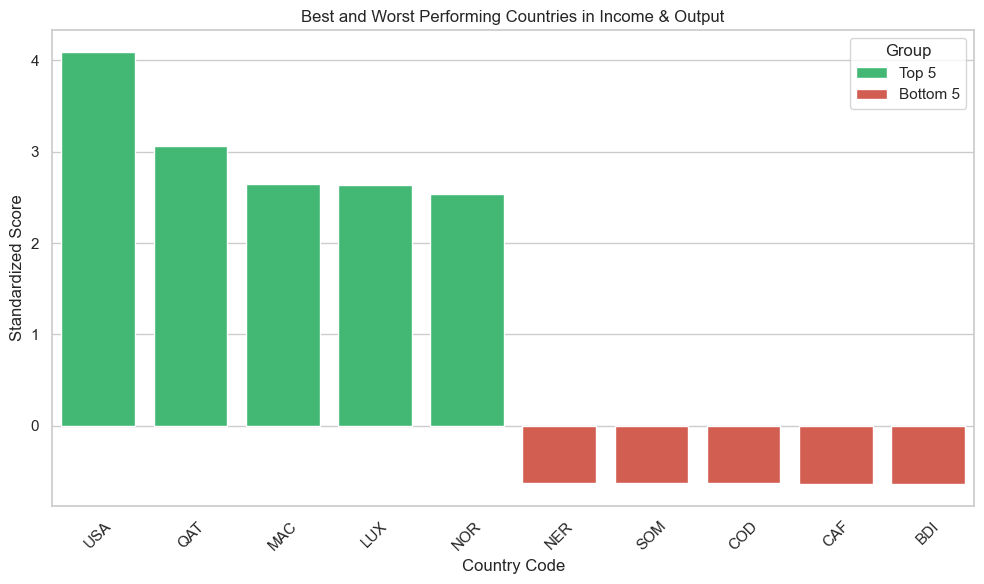

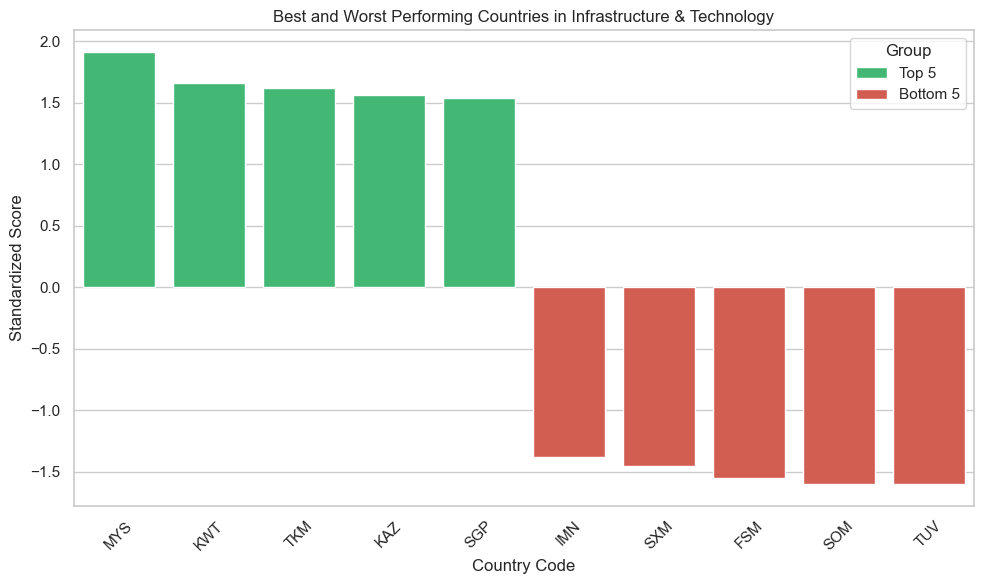

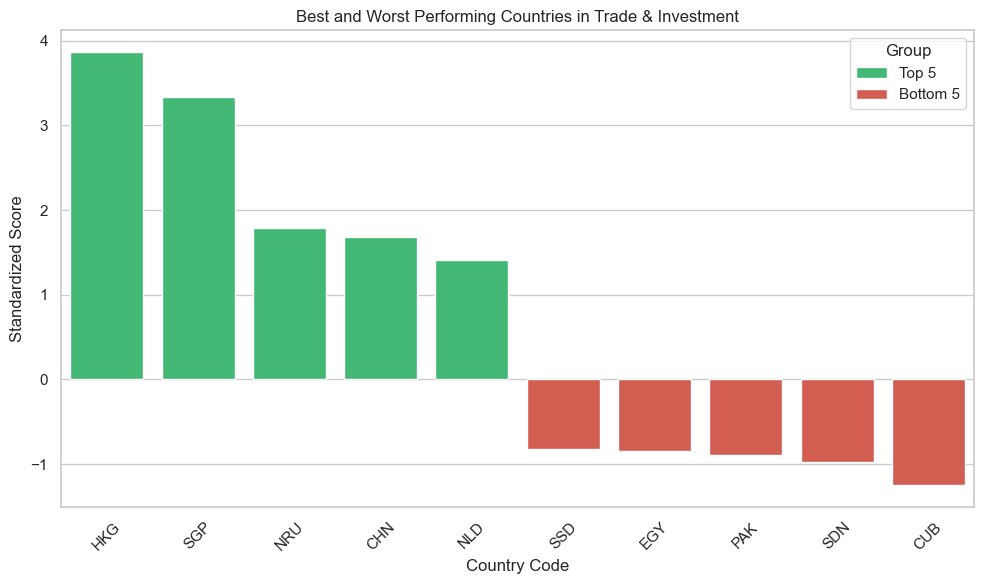

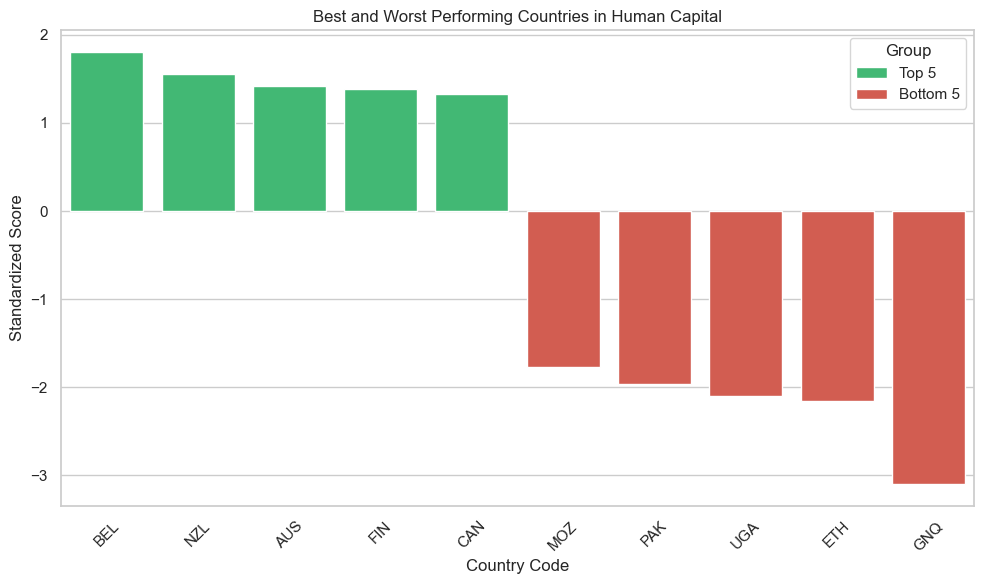

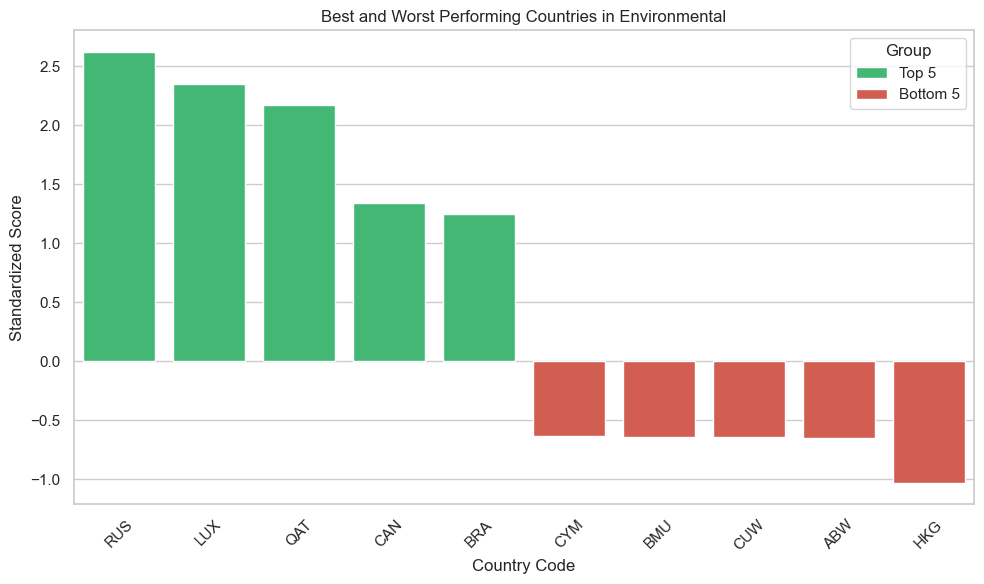

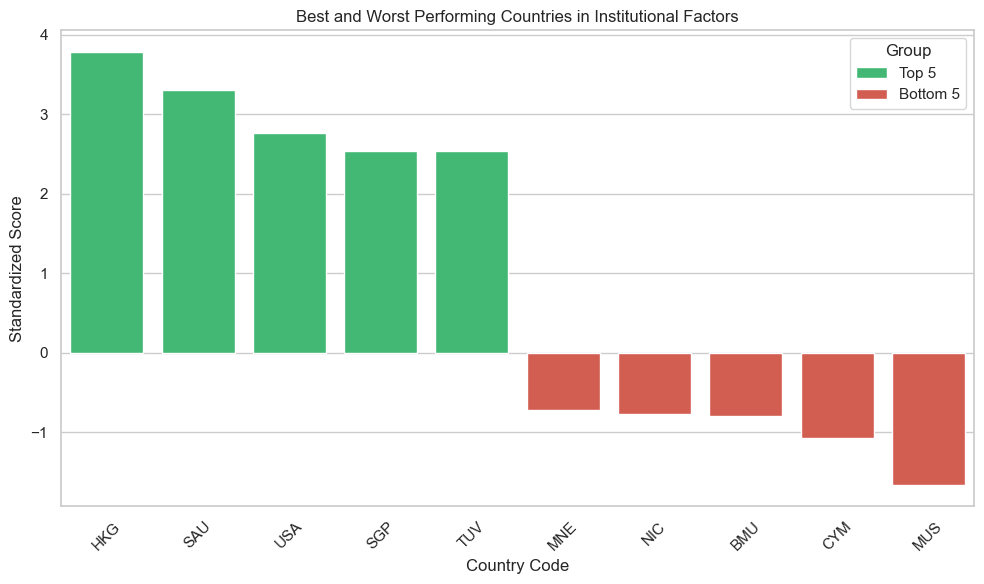

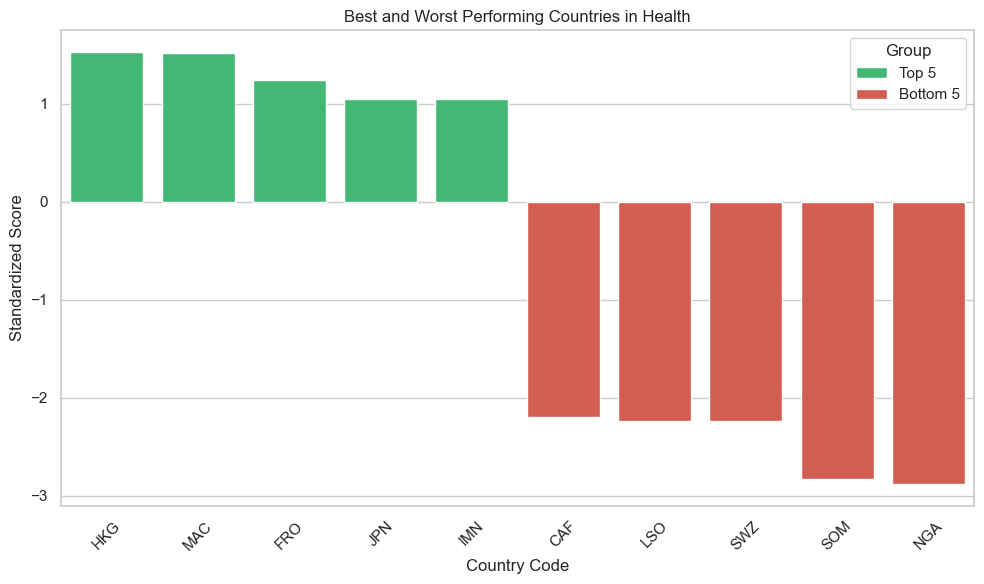

In [204]:

# Loop through each theme score and plot top and bottom 5 countries
for score_col in theme_score_cols:
    theme_name = score_col.replace('_Score', '')

    # Drop NaNs for this score
    score_data = standardized_df_14[['country_code', score_col]].dropna()

    # Skip if too few countries to show both top and bottom
    if score_data.shape[0] < 10:
        continue

    # Sort and select top/bottom
    sorted_df = score_data.sort_values(by=score_col, ascending=False)
    top5 = sorted_df.head(5)
    bottom5 = sorted_df.tail(5)

    # Combine for plotting
    plot_df = pd.concat([top5, bottom5])
    plot_df['Group'] = ['Top 5'] * 5 + ['Bottom 5'] * 5

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(data=plot_df, x='country_code', y=score_col, hue='Group', palette=['#2ecc71', '#e74c3c'])
    plt.title(f'Best and Worst Performing Countries in {theme_name}')
    plt.ylabel('Standardized Score')
    plt.xlabel('Country Code')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


> **Top and Bottom Performers by Theme**  
>
> These bar charts spotlight the extremes in each development dimension—showing the five countries with the highest (green) and lowest (red) standardized scores. Rather than detailing every value (which you can read off the plot), the key takeaway is the **breadth** of variation:
> 
> - **Human Capital & Health:** Small, high-income nations dominate the top ranks, while conflict-affected or low-income states fall to the bottom.  
> - **Infrastructure & Institutions:** Wealthy, well-governed economies cluster at the top, underscoring the gap in basic services and governance capacity.  
> - **Environmental & Trade:** Performance is more mixed, but clear outliers still show which countries lead or lag global benchmarks.  
> 
> By focusing on these extremes, we confirm that no single country excels across all dimensions—and validate our **multidimensional index**. A univariate metric like GNI per capita would hide these theme-specific strengths and weaknesses, whereas our approach captures the true complexity of development.  


### Next: Comparing with World Bank GNI-Based Income Groups 🧐

To benchmark our multidimensional index against the standard approach, we replicate the World Bank’s four-tier income classification (low, lower-middle, upper-middle, high) using 2014 GNI per capita thresholds. By un-standardizing our GNI values back to USD and assigning each country to its corresponding income group, we can directly compare how well our Development Index and its thematic sub-scores align with—or diverge from—the World Bank’s income-only categorization. This side-by-side view clarifies where a composite measure adds insight beyond a single economic metric.  


In [205]:
mean_gnipc = data_2014_c['GNIPC'].mean()
std_gnipc = data_2014_c['GNIPC'].std()

# Unstandardize the 'GNIPC' values
unstandardized_gnipc = standardized_df_14['GNIPC'] * std_gnipc + mean_gnipc

# Define the classification function based on original GNI per capita
def classify_income_unstandardized(gni_value):
    if gni_value < 1046:
        return 'Low income'
    elif 1046 <= gni_value < 4126:
        return 'Lower middle income'
    elif 4126 <= gni_value < 12746:
        return 'Upper middle income'
    else:
        return 'High income'

# Apply the classification function to the unstandardized GNIPC values
standardized_df_14['Income_Group'] = unstandardized_gnipc.apply(classify_income_unstandardized)

# Check the unique income groups
standardized_df_14['Income_Group'].unique()





array(['High income', 'Low income', 'Upper middle income',
       'Lower middle income'], dtype=object)

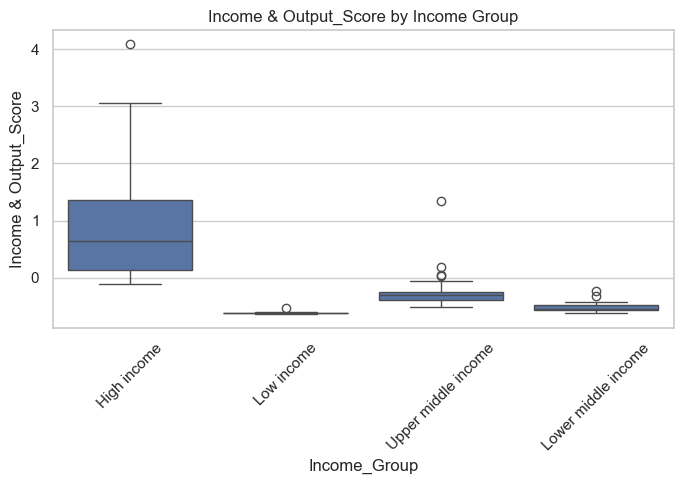

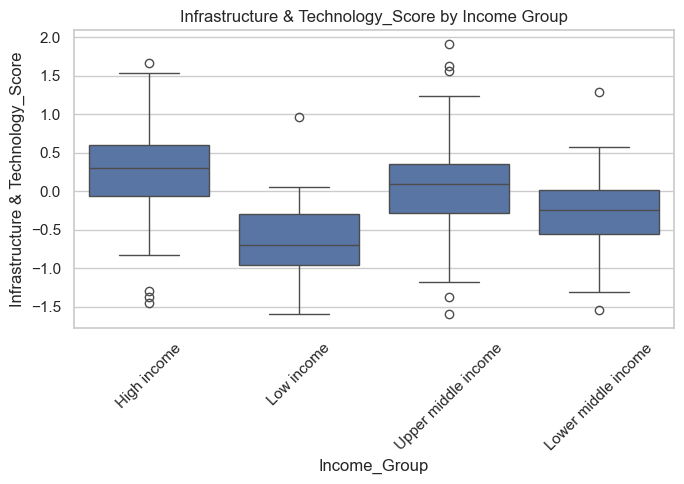

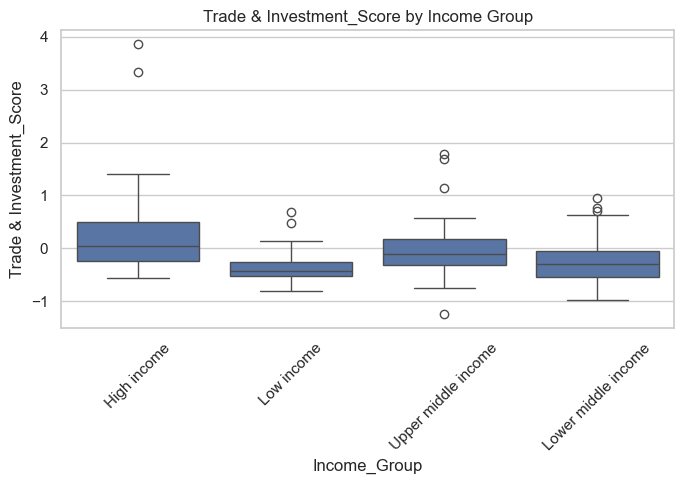

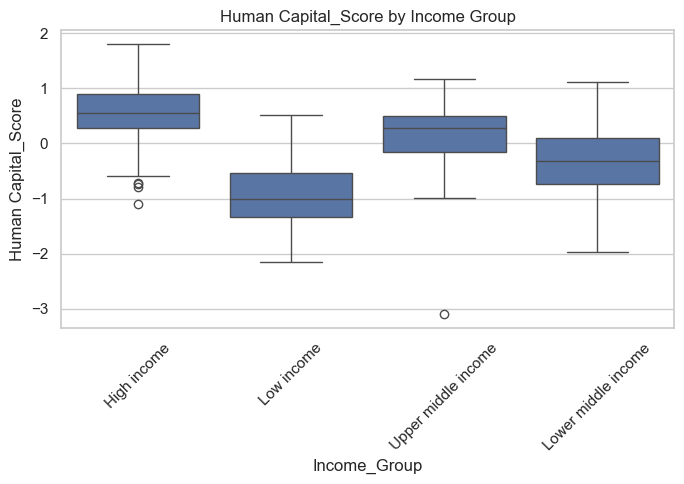

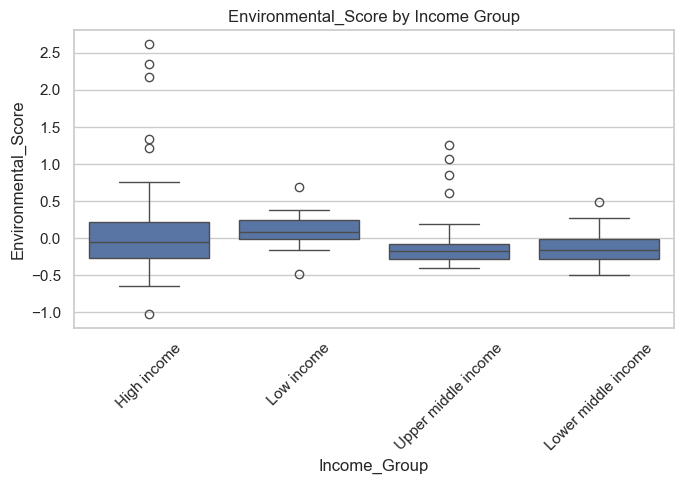

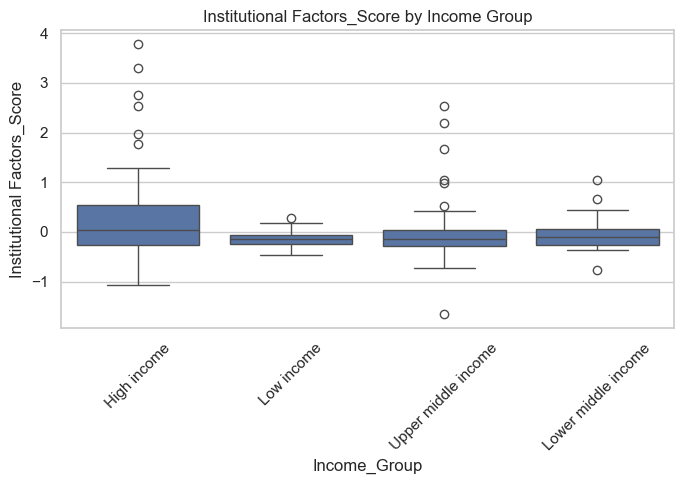

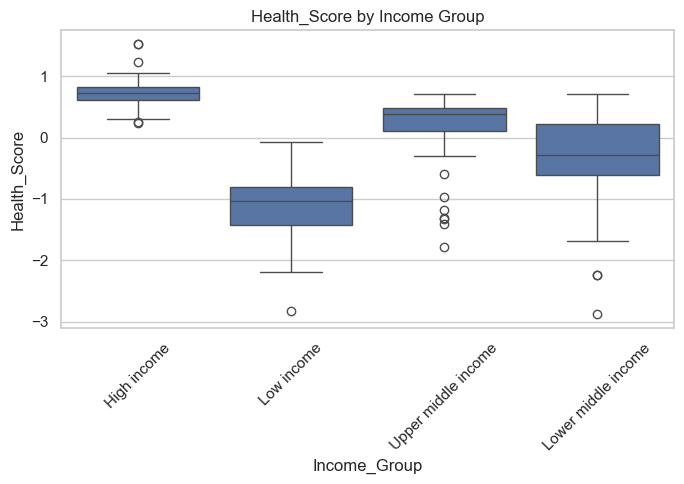

In [206]:
for col in theme_score_cols:
    plt.figure(figsize=(7, 5))
    sns.boxplot(data=standardized_df_14, x='Income_Group', y=col)
    plt.title(f'{col} by Income Group')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

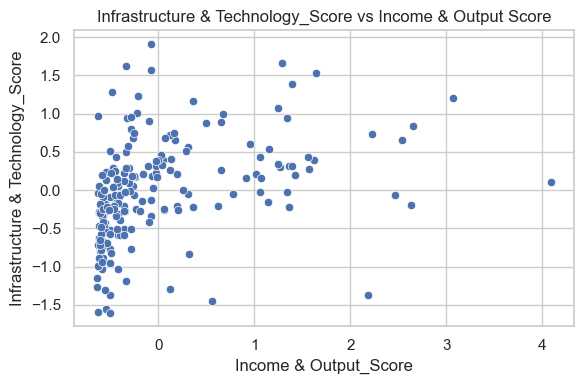

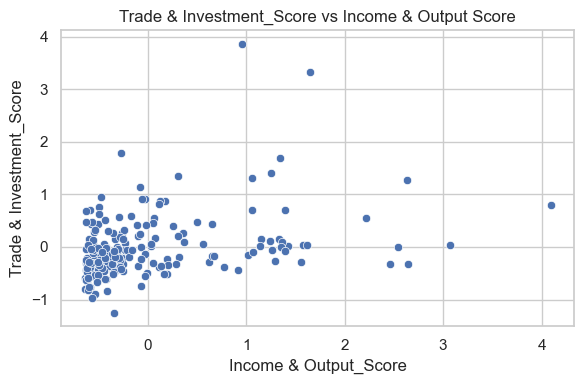

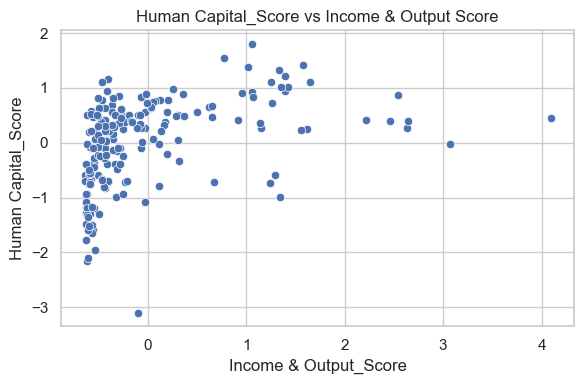

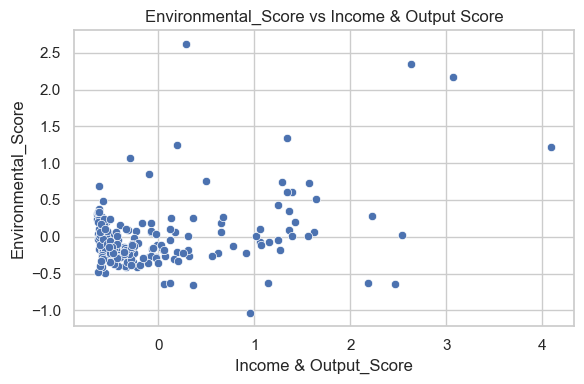

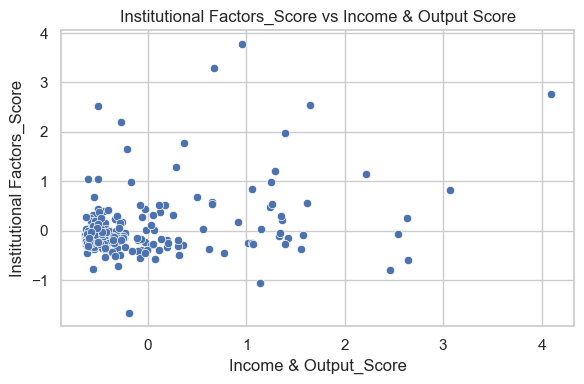

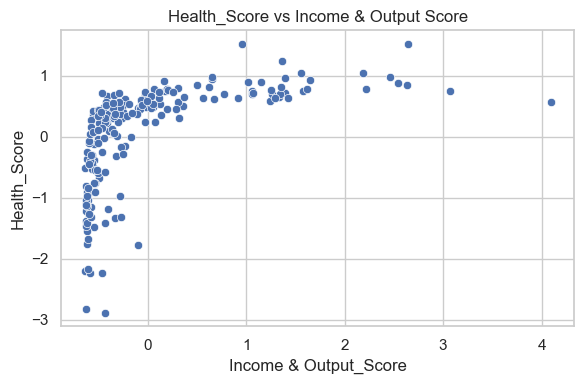

In [207]:
for col in theme_score_cols:
    if col != 'Income & Output_Score':
        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=standardized_df_14, x='Income & Output_Score', y=col)
        plt.title(f'{col} vs Income & Output Score')
        plt.tight_layout()
        plt.show()


### Exploring Relationships with the Income & Output Theme ✍️ 


The series of scatterplots comparing each thematic score against the **Income & Output** score reveals how closely different dimensions of development align with raw economic output. We observe:

- **Positive Correlations** in themes like Infrastructure & Technology and Trade & Investment, indicating that higher GDP‐related scores generally coincide with better connectivity and trade performance.
- **Moderate Dispersion** in Human Capital and Health, suggesting that countries with similar income levels can still diverge significantly in education outcomes or life‐expectancy.
- **Weak or Non‐Linear Patterns** in Environmental and Institutional Factors, where some high‐income states exhibit poor environmental performance (e.g. high CO₂ emissions) or complex governance challenges, and conversely, a few lower‐income countries punch above their weight on sustainability metrics.

These visuals underscore that **income alone does not fully explain** other facets of development—validating the need for a multidimensional index that captures these nuanced relationships.  

---

## Next Steps: Clustering and Comparative Analysis 🚶 


To build on these insights, we will apply **K-means clustering** to our standardized thematic scores. By grouping countries into clusters based on all seven themes, we can:

1. **Identify Development Archetypes**: Reveal natural country groupings that share similar profiles across income, health, education, environment, and institutions.  
2. **Compare with Income Groups**: Examine how our theme-based clusters align with—or diverge from—the World Bank’s GNI per capita categories.  
3. **Validate the Index**: Use clustering stability and silhouette scores to assess whether multidimensional groupings offer a more coherent classification than single-variable thresholds.

This clustering analysis will solidify our argument that a composite, theme-driven approach delivers richer, more actionable insights than income alone.  

In [208]:

exclude = ['Income & Output_Score']  # adjust if needed
score_cols = [col for col in theme_score_cols if col not in exclude]


clustering_data = standardized_df_14[score_cols].dropna()

kmeans = KMeans(n_clusters=4, random_state=42)
clustering_data['Cluster'] = kmeans.fit_predict(clustering_data)

# Merge back to country names if needed
standardized_df_14.loc[clustering_data.index, 'Cluster'] = clustering_data['Cluster']

/var/folders/4p/6jzhm7d56qx6sk6z2n0187f80000gn/T/ipykernel_94736/300894536.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




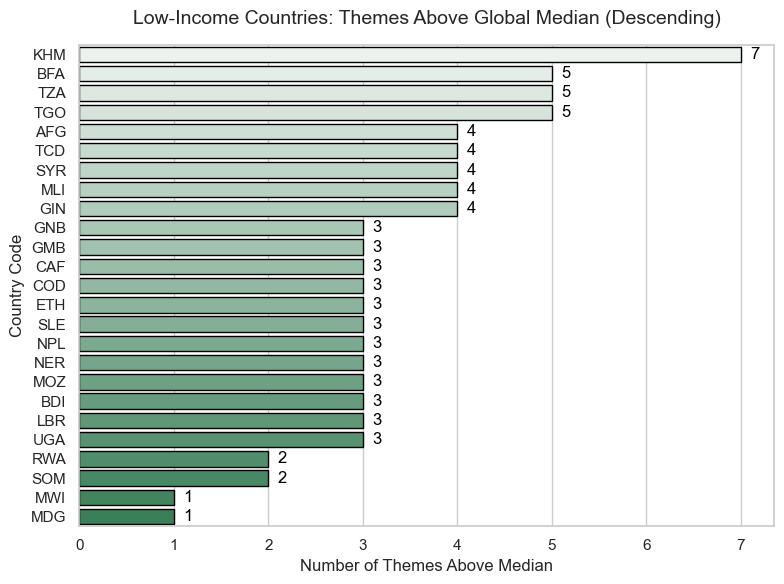

In [209]:


def plot_theme_counts(df, title):
    # 1) Identify theme scores and medians (if not already done)
    theme_scores = [c for c in df.columns if c.endswith('_Score')]
    medians = df[theme_scores].median()

    # 2) Build flags and counts
    flags = df.set_index('country_code')[theme_scores].gt(medians).astype(int)
    counts = flags.sum(axis=1).sort_values(ascending=False)

    # 3) Plot
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(8, 6))
    palette = sns.light_palette("seagreen", n_colors=len(counts), reverse=False)

    ax = sns.barplot(
        x=counts.values,
        y=counts.index,
        palette=palette,
        edgecolor="black"
    )

    # 4) Annotate
    for i, v in enumerate(counts.values):
        ax.text(v + 0.1, i, str(v), color='black', va='center')

    # 5) Styling
    ax.set_title(title, fontsize=14, pad=15)
    ax.set_xlabel("Number of Themes Above Median", fontsize=12)
    ax.set_ylabel("Country Code", fontsize=12)
    plt.tight_layout()
    plt.show()


# Plot for low-income countries
plot_theme_counts(
    standardized_df_14[standardized_df_14['Income_Group'] == 'Low income'],
    "Low-Income Countries: Themes Above Global Median (Descending)"
)



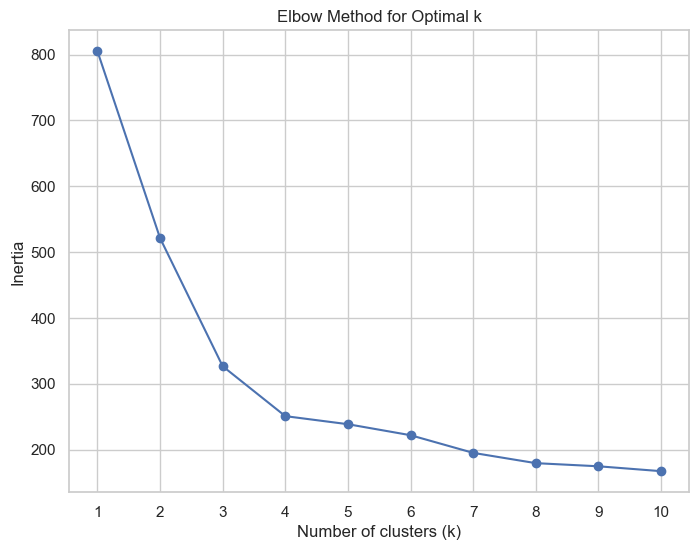

In [210]:
inertia = []
for k in range(1, 11):  
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_data)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

### Choosing Four Clusters (k = 4️⃣)

Although the “elbow” in our inertia curve isn’t perfectly sharp at k = 4, it represents a clear inflection point where adding more clusters yields diminishing returns. Practically, four clusters strike a balance between capturing nuanced development profiles and maintaining interpretability. This choice also harmonizes with the World Bank’s four income groups—allowing us to directly compare our theme‐based clusters against low, lower-middle, upper-middle, and high-income quintiles in later analyses. By aligning our multidimensional clustering with an established four-tier framework, we ensure both methodological rigor and policy relevance.  


In [211]:
pd.crosstab(standardized_df_14['Income_Group'], standardized_df_14['Cluster'])


Cluster,0.0,1.0,2.0,3.0
Income_Group,,,,
High income,16,10,1,31
Low income,2,0,22,0
Lower middle income,24,0,24,4
Upper middle income,34,1,8,12


In [212]:
import plotly.graph_objects as go
import pandas as pd

# Create crosstab
flow_df = pd.crosstab(standardized_df_14['Income_Group'], standardized_df_14['Cluster'])

# Prepare labels
source_labels = list(flow_df.index)
target_labels = [f"Cluster {c}" for c in flow_df.columns]
all_labels = source_labels + target_labels

# Prepare color palettes
color_map = {
    'Low income': '#636EFA',
    'Lower middle income': '#EF553B',
    'Upper middle income': '#00CC96',
    'High income': '#AB63FA'
}
cluster_colors = ['#FFD700', '#FF7F0E', '#1F77B4', '#2CA02C']  # Choose 4 distinct colors

node_colors = [color_map.get(label, 'grey') for label in source_labels] + cluster_colors

# Sankey input: source, target, values
source_indices = []
target_indices = []
values = []

for i, income_group in enumerate(source_labels):
    for j, cluster in enumerate(flow_df.columns):
        count = flow_df.loc[income_group, cluster]
        if count > 0:
            source_indices.append(i)
            target_indices.append(len(source_labels) + j)
            values.append(count)

# Sankey diagram
fig = go.Figure(data=[go.Sankey(
    arrangement="snap",  # Helps spread nodes
    node=dict(
        pad=20,
        thickness=30,
        line=dict(color="black", width=0.5),
        label=all_labels,
        color=node_colors
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=values,
        color="rgba(160,160,160,0.4)"  # Optional: soft grey links
    )
)])

fig.update_layout(
    title_text="Flow from Income Groups to KMeans Clusters",
    font_size=12,
    width=1000,
    height=600
)
fig.show()


### Mapping Income Groups into K-Means Clusters 🗺️

The Sankey chart above visualizes how the World Bank’s 2014 GNI-per-capita bands (“Low,” “Lower middle,” “Upper middle,” “High”) feed into the four K-Means clusters derived from our PCA-weighted Development Index. Three patterns stand out:

1. **High-income divergence**  
   Contrary to a one-to-one mapping, high-income economies (purple node) now spread across two dominant clusters. A substantial flow goes into **Cluster 3** (green), our “top-tier” group with the strongest social and institutional metrics, while a non-trivial portion joins **Cluster 2** (blue), suggesting that even some wealthy economies under-perform on certain themes (e.g. governance or environmental indicators).

2. **Low-income concentration**  
   Most low-income countries (blue node) funnel into **Cluster 2**, the “under-served” archetype with weaker overall development profiles. Only a thin strand reaches **Cluster 0** (gold), indicating a handful of low-income outliers with stronger health or education outcomes.

3. **Middle-band heterogeneity**  
   - **Lower middle incomes** (red) split primarily between **Cluster 0** and **Cluster 2**, underscoring divergent pathways: some are catching up in infrastructure and human capital, while others remain closer to the weakest group.  
   - **Upper middle incomes** (teal) send the largest share into **Cluster 0**—our “mid-pack” cluster with solid but not top scores—yet also feed significantly into Cluster 3 and Cluster 2, reflecting real variation in theme-based performance that GNI alone masks.

**What this tells us:**  
If income per capita were the sole driver, we’d see almost straight vertical flows (each income band mapping to one cluster). Instead, the fan-out—especially for the two middle bands and the split among high‐income countries—reveals that our multidimensional index captures meaningful subgroups within each GNI category. In other words, this Sankey confirms both the **overlap** (many upper middle incomes do align with stronger clusters) and the **divergence** (some high‐income outliers underperform on non-income dimensions) between traditional income classes and our PCA/K-Means development archetypes.

Overall, the chart powerfully demonstrates why a purely monetary classification can overlook critical differences in health, education, environment and governance—differences our Development Index is explicitly designed to surface.


🧪 Quick Analogy:

Imagine clustering students by skills (math, writing, science) without using their test scores. Then compare those clusters to test score bands (e.g. A, B, C). If the clusters don’t align perfectly, it suggests the test score doesn’t reflect the full picture of their skills.

### Visualizing Cluster Separation via PCA

After standardizing our seven thematic scores, we project them into two dimensions using PCA and color by K-means cluster. The clear groupings in the scatterplot confirm that our four clusters capture distinct development archetypes—validating both our theme selection and the choice of k=4.


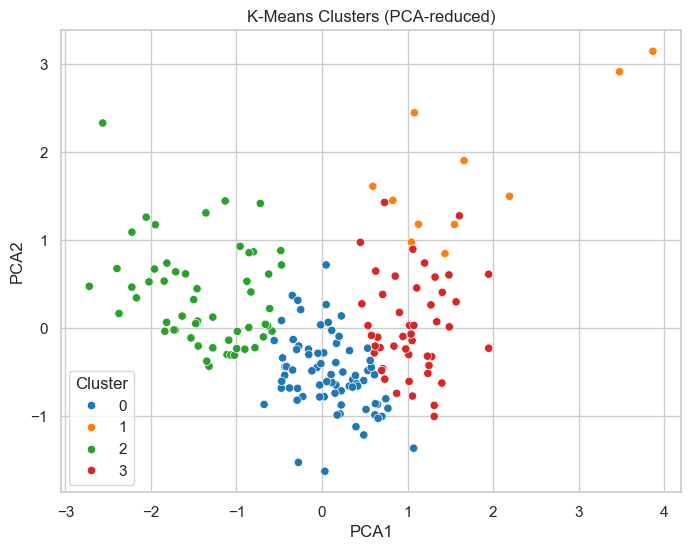

In [213]:

from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
components = pca.fit_transform(clustering_data.drop(columns='Cluster'))
clustering_data['PCA1'] = components[:, 0]
clustering_data['PCA2'] = components[:, 1]

# Plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=clustering_data, x='PCA1', y='PCA2', hue='Cluster', palette='tab10')
plt.title('K-Means Clusters (PCA-reduced)')
plt.show()


### GNI per Capita Distribution by Cluster 👫

This box plot compares the standardized GNI per capita (GNIPC) across our four theme-driven clusters, helping us see where traditional income categories align—and diverge—from the multidimensional groupings.

- **Cluster 1 (index 1)**  
  - **Highest median GNIPC** and a wide interquartile range (IQR), confirming it contains the wealthiest economies.  
  - The presence of outliers above +4 indicates a handful of exceptionally high-income nations.

- **Cluster 3 (index 3)**  
  - **Mid-range GNIPC** with a median close to zero and moderate spread, reflecting upper-middle performers on our composite index.  
  - Some low and high outliers suggest this group mixes economies that income alone wouldn’t distinguish.

- **Cluster 0 (index 0)**  
  - **Lower median GNIPC**, below zero, but with a fatter upper whisker and several positive outliers—showing that some relatively well-off countries score lower on non-income themes (e.g. governance, environment).  

- **Cluster 2 (index 2)**  
  - **Lowest and tightest GNIPC distribution**, with most values well below zero and little spread, indicating the poorest economies also underperform across our thematic dimensions.

**Key Takeaways**  
1. **Overlap & Divergence**: While Clusters 1 and 2 map neatly to the top and bottom of the income spectrum, Clusters 0 and 3—despite overlapping GNIPC ranges—are separated by their composite performance.  
2. **Beyond Income**: Countries with similar per-capita incomes may fall into different clusters because of divergent outcomes on health, education, infrastructure, and institutions.  
3. **Nuanced Classification**: This plot underscores that income alone can’t capture the full development picture. Our PCA/K-Means clusters reveal latent groupings that traditional GNI bands miss, supporting a multidimensional approach to economic classification.  


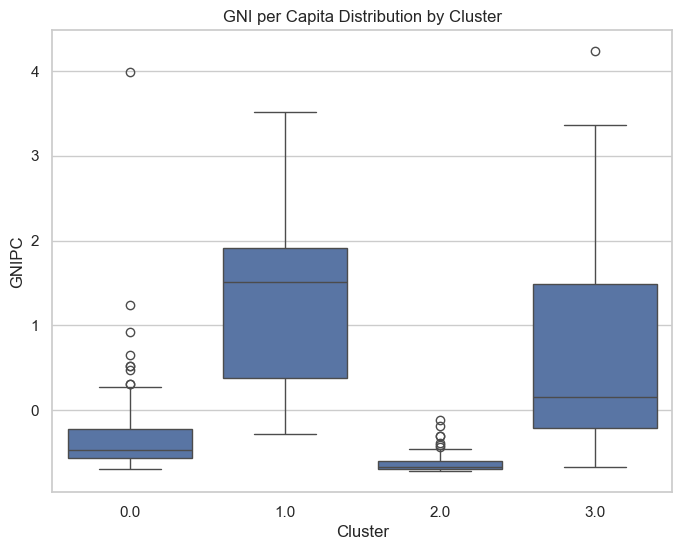

In [ ]:

plt.figure(figsize=(8,6))
sns.boxplot(data=standardized_df_14, x='Cluster', y='GNIPC')
plt.title('GNI per Capita Distribution by Cluster')
plt.show()

### Effect of Including GNI in PCA 🤔

Comparing explained‐variance curves for PCA with and without GNI shows that adding GNI slightly boosts variance captured by PC1 (from ~45% up to ~48%), but the overall component structure remains stable.  We therefore choose to **exclude** GNI from the Development Index construction to avoid redundancy—ensuring the index reflects truly multivariate patterns rather than income alone.


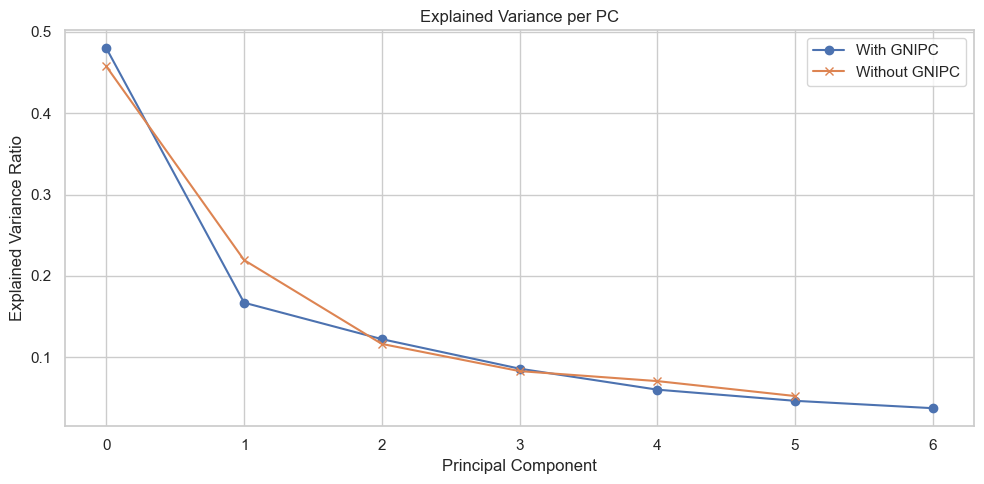


Top features in PC1 (with GNIPC):
GNIPC                                0.614141
Health_Score                         0.486521
Human Capital_Score                  0.441542
Infrastructure & Technology_Score    0.271780
Trade & Investment_Score             0.258195
Institutional Factors_Score          0.210841
Environmental_Score                  0.078655
Name: PC1, dtype: float64

Top features in PC1 (without GNIPC):
Health_Score                         0.619336
Human Capital_Score                  0.581165
Trade & Investment_Score             0.332065
Infrastructure & Technology_Score    0.320345
Institutional Factors_Score          0.253622
Environmental_Score                  0.038185
Name: PC1, dtype: float64


In [215]:

# Step 1: Define columns
theme_cols = [col for col in standardized_df_14.columns if col.endswith('_Score') and 'Income & Output_Score' not in col]
with_gni_cols = theme_cols + ['GNIPC']
without_gni_cols = theme_cols  # already excludes 'Income & Output_Score'

# Step 2: Drop NaNs based on full set of with_gni_cols (so both PCAs are based on same rows)
common_index = standardized_df_14[with_gni_cols].dropna().index

df_with_gni = standardized_df_14.loc[common_index, with_gni_cols]
df_without_gni = standardized_df_14.loc[common_index, without_gni_cols]

# Step 3: Run PCA with GNIPC
pca_with_gni = PCA()
components_with_gni = pca_with_gni.fit_transform(df_with_gni)
loadings_with_gni = pd.DataFrame(
    pca_with_gni.components_.T,
    columns=[f'PC{i+1}' for i in range(len(with_gni_cols))],
    index=with_gni_cols
)

# Step 4: Run PCA without GNIPC
pca_without_gni = PCA()
components_without_gni = pca_without_gni.fit_transform(df_without_gni)
loadings_without_gni = pd.DataFrame(
    pca_without_gni.components_.T,
    columns=[f'PC{i+1}' for i in range(len(without_gni_cols))],
    index=without_gni_cols
)

# Step 5: Assign Development Index from PC1 (without GNIPC)
standardized_df_14.loc[common_index, 'Development_Index'] = components_without_gni[:, 0]

# Step 6: Explained variance comparison
plt.figure(figsize=(10, 5))
plt.plot(pca_with_gni.explained_variance_ratio_, label='With GNIPC', marker='o')
plt.plot(pca_without_gni.explained_variance_ratio_, label='Without GNIPC', marker='x')
plt.title("Explained Variance per PC")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 7: Print feature importance
print("\nTop features in PC1 (with GNIPC):")
print(loadings_with_gni['PC1'].sort_values(key=abs, ascending=False))

print("\nTop features in PC1 (without GNIPC):")
print(loadings_without_gni['PC1'].sort_values(key=abs, ascending=False))


### The Math Behind Our PCA-Derived Development Index 🤓

Below is a clean derivation. Use single `$…$` for inline math, and put block equations between lines of `$$`.

1. **Standardize each theme**  
   For country $i$ and theme $j$, compute  
   $$
   z_{ij} = \frac{x_{ij} - \bar{x}_j}{s_j}
   $$
   where  
   - $x_{ij}$ is the raw score  
   - $\bar{x}_j$ is the mean of theme $j$  
   - $s_j$ is the standard deviation of theme $j$

2. **Form the covariance matrix**  
   Let $\mathbf{Z}$ be the $N\times T$ matrix of all $z_{ij}$. Then  
   $$
   \mathbf{C} = \frac{1}{N}\,\mathbf{Z}^\top \mathbf{Z}.
   $$

3. **Solve the eigenproblem**  
   Find the unit‐length eigenvector $\boldsymbol{\ell}$ corresponding to the largest eigenvalue $\lambda_{\max}$:  
   $$
   \mathbf{C}\,\boldsymbol{\ell} = \lambda_{\max}\,\boldsymbol{\ell},
   \quad \|\boldsymbol{\ell}\| = 1.
   $$

4. **Interpret the loadings**  
   The loadings $\ell_j$ show each theme’s weight on PC1.  Our computed loadings (without GNI) were:

   | Theme                               | Loading $\ell_j$ |
   |-------------------------------------|-----------------:|
   | Health\_Score                       |           0.6193 |
   | Human\_Capital\_Score               |           0.5811 |
   | Trade\_&\_Investment\_Score         |           0.3321 |
   | Infrastructure\_&\_Technology\_Score|           0.3203 |
   | Institutional\_Factors\_Score       |           0.2536 |
   | Environmental\_Score                |           0.0382 |

5. **Project each country onto PC1**  
   Each country’s Development Index is  
   $$
   \mathrm{DevIndex}_i = \mathbf{z}_i^\top \boldsymbol{\ell}
   = \sum_{j=1}^{T}\ell_j\,z_{ij}.
   $$


> **Why this matters:**  
> Using the first eigenvector’s components as weights ensures our index highlights the themes that co-vary most strongly—capturing a data-driven “development” signal rather than relying on arbitrary weights.  


In [223]:
# First, make sure the rows are aligned with their indices
valid_rows = standardized_df_14[with_gni_cols].dropna().index

# Now, we need to assign only to these rows where there was no missing data
standardized_df_14.loc[valid_rows, 'Development_Index'] = components_without_gni[:, 0]



### Comparing GNI per Capita and Our PCA-Based Development Index ✍️

Before diving into more complex models, it’s useful to check the **Pearson correlation** between standardized GNI per capita (GNIPC) and our PCA-derived Development Index. A moderate correlation (e.g. \(r = 0.60\)) tells us:

- **Shared signal**: GNIPC captures a substantial—but not exhaustive—portion of the underlying “development” pattern that our multivariate index also identifies.  
- **Added nuance**: Since \(r<1\), the Development Index brings in information from other thematic dimensions (health, human capital, infrastructure, etc.) that GNIPC alone misses.  
- **Justification**: This initial sanity check confirms that our index is meaningfully related to income, yet still enriches the analysis by embedding broader, non-income factors into a single metric.  


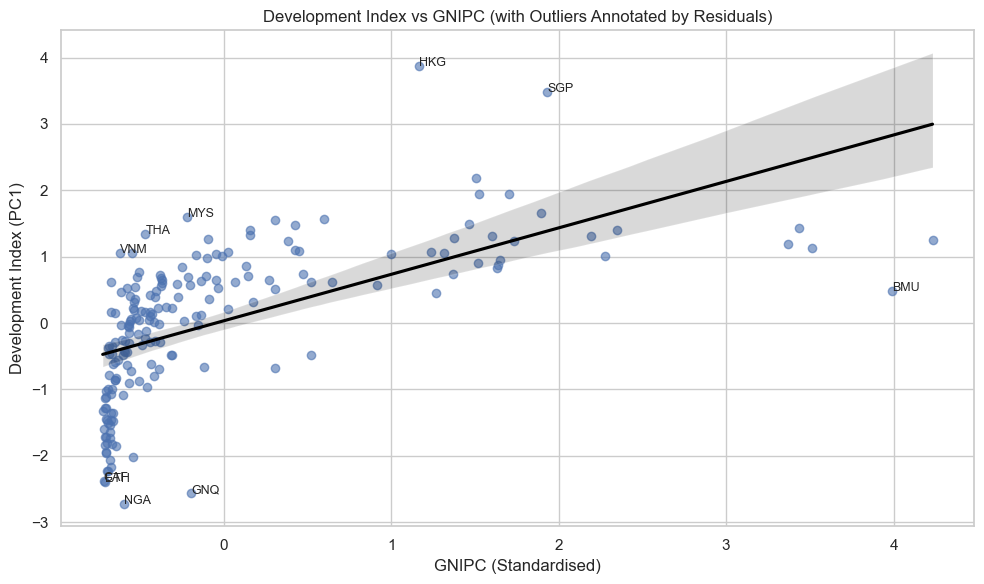

In [224]:

# Prepare the data
df = standardized_df_14[['country_code', 'GNIPC', 'Development_Index']].dropna().copy()

# Fit linear regression model
model = LinearRegression()
model.fit(df[['GNIPC']], df['Development_Index'])
df['Predicted_Dev'] = model.predict(df[['GNIPC']])
df['Residuals'] = df['Development_Index'] - df['Predicted_Dev']

# Identify top over- and under-performers
top_residuals = df.sort_values(by='Residuals', ascending=False).head(5)
bottom_residuals = df.sort_values(by='Residuals').head(5)

# Plot regression + annotate key outliers
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='GNIPC', y='Development_Index', scatter_kws={'alpha': 0.6}, line_kws={'color': 'black'})

for _, row in pd.concat([top_residuals, bottom_residuals]).iterrows():
    plt.text(row['GNIPC'], row['Development_Index'], row['country_code'], fontsize=9)

plt.title("Development Index vs GNIPC (with Outliers Annotated by Residuals)")
plt.xlabel("GNIPC (Standardised)")
plt.ylabel("Development Index (PC1)")
plt.grid(True)
plt.tight_layout()
plt.show()



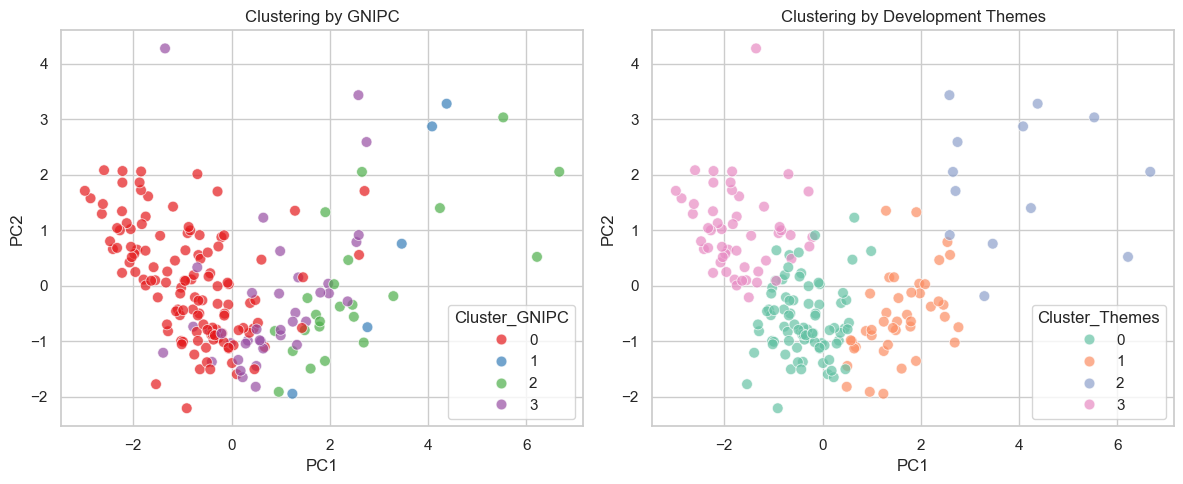

In [225]:
# Define which columns are our theme-score columns
theme_scores = [c for c in standardized_df_14.columns if c.endswith("_Score")]


# Prepare the two inputs for clustering
gnipc_input  = standardized_df_14[['GNIPC']].dropna()
theme_input  = standardized_df_14[theme_scores].dropna()

# Align their indexes so we only cluster on countries present in both
common_index = gnipc_input.index.intersection(theme_input.index)
gnipc_input  = gnipc_input.loc[common_index]
theme_input  = theme_input.loc[common_index]

# Fit two separate KMeans
kmeans_gni    = KMeans(n_clusters=4, random_state=42).fit(gnipc_input)
kmeans_theme  = KMeans(n_clusters=4, random_state=42).fit(theme_input)

# Build the 'comparison' DataFrame
comparison = pd.DataFrame({
    'Cluster_GNIPC':   kmeans_gni.labels_,
    'Cluster_Themes':  kmeans_theme.labels_
}, index=common_index)

#Run PCA on your theme scores
scaler      = StandardScaler()
themes_scl  = scaler.fit_transform(theme_input)
pca_2d      = PCA(n_components=2)
components  = pca_2d.fit_transform(themes_scl)

comparison['PC1'] = components[:, 0]
comparison['PC2'] = components[:, 1]

# Now plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(
    data=comparison,
    x='PC1', y='PC2',
    hue='Cluster_GNIPC',
    palette='Set1',
    s=60, alpha=0.7
)
plt.title("Clustering by GNIPC")

plt.subplot(1, 2, 2)
sns.scatterplot(
    data=comparison,
    x='PC1', y='PC2',
    hue='Cluster_Themes',
    palette='Set2',
    s=60, alpha=0.7
)
plt.title("Clustering by Development Themes")

plt.tight_layout()
plt.show()


## Comparing Income‐Based vs. Theme‐Based Clusters 🔎

When we project our seven development theme scores into two principal components and colour points by (1) GNI per capita clusters versus (2) theme‐based clusters, a clear story emerges:

- **Income‐only clustering** tends to slice countries into vertical bands based strictly on log GNI per capita. While this separates very rich from very poor, it often lumps together nations with very different social, health, and institutional profiles.
- **Theme‐based clustering** (right panel) draws groups according to the full multivariate “development fingerprint” of each country—so you see clusters of high-health/human-capital performers, infrastructure-heavy economies, trade-oriented states, etc., even when those share similar incomes.

> **Key takeaway:** Using PCA on all themes reveals deeper nuance than income alone. Two countries with the same GNI bucket may belong to entirely different development clusters once we account for health, education, infrastructure, governance and environmental performance. Theme‐based clusters thus offer richer, more policy‐relevant groupings, so we’ll focus on these rather than an income‐only segmentation moving forward.


In [226]:
X_cluster = standardized_df_14[['Development_Index']].dropna()
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_cluster)

# Add cluster labels back to the main dataframe
standardized_df_14.loc[X_cluster.index, 'My_Dev_Group'] = clusters

standardized_df_14.groupby('My_Dev_Group')[['Development_Index', 'GNIPC']].mean()

,Development_Index,GNIPC
My_Dev_Group,,
0.0,0.393785,-0.118043
1.0,-1.799500,-0.665231
2.0,1.409533,1.116763
3.0,-0.586703,-0.520725


## Translating a Continuous Development Index into Four Discrete “Development Bands” 🧠

To make our PCA-derived Development Index more interpretable, we split it into four ordered categories—Low, Medium–Low, Medium–High, and High—by combining **quartile thresholds** with **K-Means centroids**.

1. **Quartile thresholds**  
   Compute the 25th, 50th, and 75th percentiles of the index (denoted $Q_1$, $Q_2$, $Q_3$) via the empirical CDF $F_D(x)$:
   $$
     Q_k \;=\; \inf\{\,x : F_D(x)\ge \tfrac{k}{4}\},
     \quad k=1,2,3.
   $$

2. **K-Means centroids**  
   Run K-Means with $K=4$ on the one-dimensional index.  K-Means chooses centroids $\{c_j\}_{j=1}^4$ by minimizing:
   $$
     \sum_{i=1}^N \min_{1\le j\le4}\,(D_i - c_j)^2,
   $$
   where $D_i$ is country $i$’s index value.  These centroids capture the natural “gaps” or modes in the distribution.

3. **Mapping centroids to bands**  
   Assign each centroid $c_j$ to a development band:
   - If $c_j < Q_1$, label **Low Development**  
   - Else if $c_j < Q_2$, label **Medium–Low Development**  
   - Else if $c_j < Q_3$, label **Medium–High Development**  
   - Else, label **High Development**

4. **Assigning countries**  
   Each country inherits the band of the centroid to which its index value was assigned by K-Means.



### Why this hybrid approach?
- **Quartiles** ensure roughly equal group sizes (≈25% per band) and are intuitively familiar.  
- **Centroids** adapt to the data’s actual clustering—highlighting natural breaks rather than rigid percentiles.  
- **Combining both** yields categories that are both statistically principled and easy to communicate, striking a balance between rigor and clarity.


In [227]:
# Step 1: Remove rows with NaN values in 'Development_Index' before clustering
X_cluster = standardized_df_14[['Development_Index']].dropna()  # Drop rows with NaN in Development_Index

# Step 2: Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_cluster)

# Step 3: Get the centroids and assign descriptive labels
centroids = kmeans.cluster_centers_

quantiles = standardized_df_14['Development_Index'].quantile([0.25, 0.5, 0.75]).values
labels = []
for centroid in centroids:
    if centroid[0] < quantiles[0]:
        labels.append('Low Development')
    elif centroid[0] < quantiles[1]:
        labels.append('Medium-Low Development')
    elif centroid[0] < quantiles[2]:
        labels.append('Medium-High Development')
    else:
        labels.append('High Development')


# Step 4: Map cluster labels to the original data frame
# First, create the cluster labels for the rows that were used in the clustering
cluster_labels = [labels[cluster] for cluster in kmeans.labels_]

# Create a new series for the 'Dev_Cluster_Label' column
dev_cluster_labels = pd.Series([None] * len(standardized_df_14), index=standardized_df_14.index)

# Assign the cluster labels to the corresponding rows in the original dataframe
dev_cluster_labels[X_cluster.index] = cluster_labels

# Step 5: Add the labels back to the original dataframe
standardized_df_14['Dev_Cluster_Label'] = dev_cluster_labels

# Check the results
print(standardized_df_14[['Development_Index', 'My_Dev_Group', 'Dev_Cluster_Label']].head())




   Development_Index  My_Dev_Group        Dev_Cluster_Label
0           0.745455           0.0  Medium-High Development
1          -1.110165           3.0   Medium-Low Development
2          -0.877483           3.0   Medium-Low Development
3           0.700145           0.0  Medium-High Development
4           2.191271           2.0         High Development


In [228]:
#Checking what these unique classifications are!
standardized_df_14['Dev_Cluster_Label'].unique()

array(['Medium-High Development', 'Medium-Low Development',
       'High Development', 'Low Development', None], dtype=object)

In [229]:

# 1) pull out the 2014 GDP series and copy
gdp_2014 = (
    data_2014
    .loc[:, ['country_code', 'GDP growth (annual %)']]
    .copy()
)

# 2) scale it into a new column
scaler = StandardScaler()
gdp_2014['GDP_growth'] = scaler.fit_transform(
    gdp_2014[['GDP growth (annual %)']]
)

# 3) merge that back onto your already-filtered 2014 DataFrame
standardized_df_14 = (
    standardized_df_14
    .merge(gdp_2014[['country_code', 'GDP_growth']],
           on='country_code',
           how='left')
)


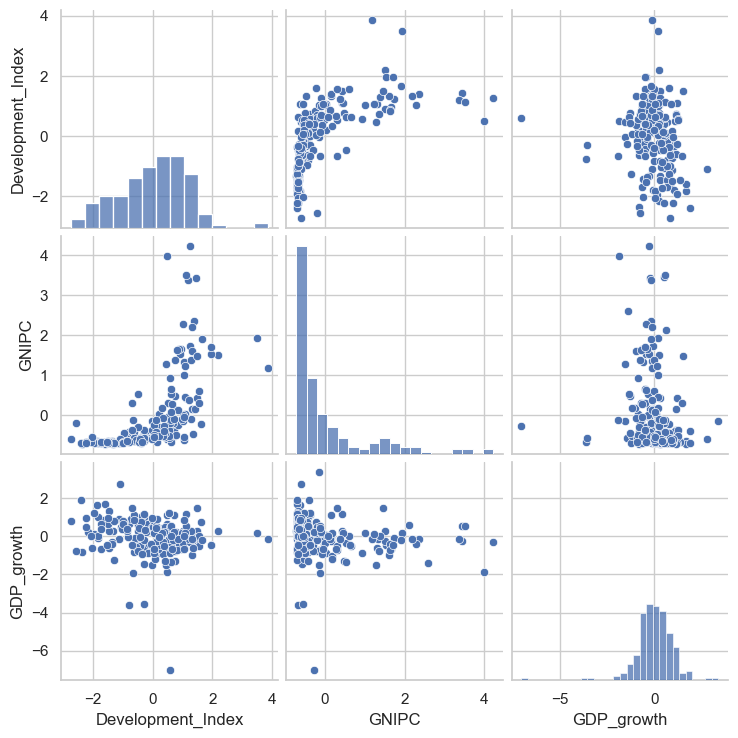

In [230]:
sns.pairplot(standardized_df_14[['Development_Index', 'GNIPC', 'GDP_growth']])
plt.show()

**Bottom Line**

- The PCA‐derived Development Index aligns closely with GNI per capita, confirming it robustly captures a “wealth” axis.  
- Neither the Development Index nor income alone predict short-term GDP growth—lower-income countries often show stronger one-year growth, reflecting convergence dynamics.  
- This reinforces that our index measures a stable, multivariate “development” signal, distinct from the cyclical ups and downs of GDP growth.  


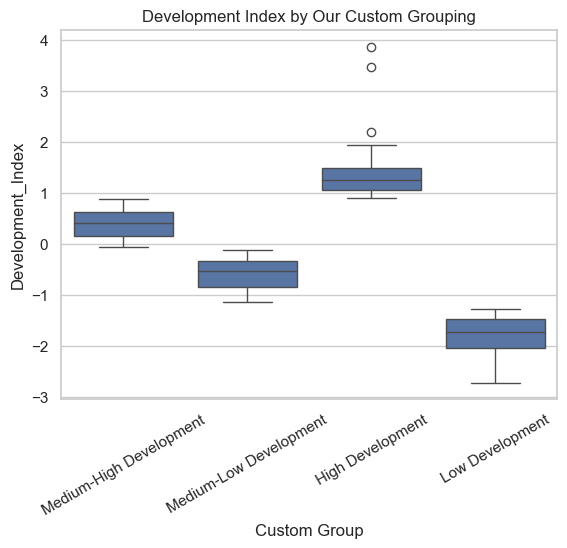

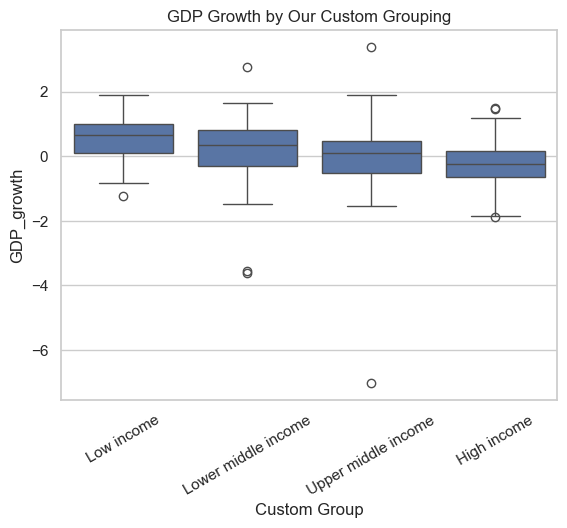

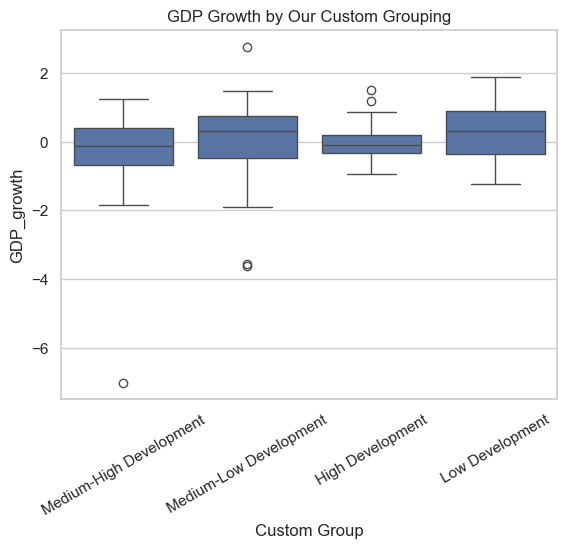

In [233]:
# Boxplot: Development Index by Custom Grouping
sns.boxplot(x='Dev_Cluster_Label', y='Development_Index', data=standardized_df_14)
plt.title('Development Index by Our Custom Grouping')
plt.xlabel('Custom Group')
plt.xticks(rotation=30)  # or try 45 or 60 for better visibility
plt.show()

# Boxplot: GDP Growth by Custom Grouping
sns.boxplot(x='income_group', y='GDP_growth', data=standardized_df_14)
plt.title('GDP Growth by Our Custom Grouping')
plt.xlabel('Custom Group')
plt.xticks(rotation=30)
plt.show()


sns.boxplot(x='Dev_Cluster_Label', y='GDP_growth', data=standardized_df_14)
plt.title('GDP Growth by Our Custom Grouping')
plt.xlabel('Custom Group')
plt.xticks(rotation=30)
plt.show()


**Key Takeaways from the Box-Plots**

- Our PCA-based development bands show clear, stepwise increases in the Development Index from “Low” through “High,” confirming they’re well-separated.  
- In contrast, the World Bank’s income groups yield highly overlapping GDP-growth distributions, with lower-income countries often outpacing richer peers.  
- When we map GDP growth to our development bands, the trend becomes more intuitive: higher-development groups generally sit at or above average growth, while lower-development bands lag behind.  
- Overall, these plots suggest our composite Development Index aligns more cleanly with economic performance than raw income categories, highlighting its usefulness (and the limitations of income alone).


In [235]:

flow_df = pd.crosstab(standardized_df_14['income_group'], standardized_df_14['Dev_Cluster_Label'])

# Prepare labels for nodes
source_labels = list(flow_df.index)  # Labels for the classification (e.g., 'Income_Group')
target_labels = list(flow_df.columns)  # Labels for your custom clusters (e.g., 'Low Development', 'Medium-Low Development', etc.)
all_labels = source_labels + target_labels  # Combine both for the Sankey diagram

# Prepare color palettes for the nodes
color_map = {
    'Low income': '#636EFA',
    'Lower middle income': '#EF553B',
    'Upper middle income': '#00CC96',
    'High income': '#AB63FA'
}

# Assign colors for the classification and clusters
node_colors = [color_map.get(label, 'grey') for label in source_labels] + ['#FFD700', '#FF7F0E', '#1F77B4', '#2CA02C']  # Color for clusters

# Prepare Sankey input: source, target, values
source_indices = []
target_indices = []
values = []

# Loop through the flow_df to get the source, target, and values
for i, income_group in enumerate(source_labels):
    for j, cluster in enumerate(flow_df.columns):
        count = flow_df.loc[income_group, cluster]
        if count > 0:
            source_indices.append(i)
            target_indices.append(len(source_labels) + j)
            values.append(count)

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    arrangement="snap",  # Helps spread nodes for better readability
    node=dict(
        pad=20,
        thickness=30,
        line=dict(color="black", width=0.5),
        label=all_labels,
        color=node_colors
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=values,
        color="rgba(160,160,160,0.4)"  # Optional: soft grey links
    )
)])

# Customize the layout
fig.update_layout(
    title_text="Flow from Income Groups to Custom Clusters",
    font_size=12,
    width=1000,
    height=600
)

# Show the figure
fig.show()


## Flow from World Bank Income Groups to Our Development Bands 🔄

This Sankey diagram visualizes how countries classified by the World Bank’s GNI bands map into our PCA-derived “development bands”:

1. **Thicker flows = more countries.**  
   - The bulk of **High-income** countries (purple) feed into our **High Development** band (gold), confirming strong alignment at the top end.  
   - **Lower Middle-income** (red) and **Low-income** (blue) mostly flow into **Medium-Low** and **Low Development** bands (green/orange), again matching expectations.

2. **Intermediate “mixed” flows reveal nuance.**  
   - Not all **Upper Middle-income** economies (teal) land in **Medium-High**; several fall into **Medium-Low** or even **High Development**, highlighting how our multivariate index can pick out “over-achievers” (or “under-performers”) relative to income alone.

3. **Why this matters:**  
   - **Validation:** Strong diagonal (income ⇒ similar development band) shows our index broadly tracks GNI.  
   - **Value-add:** Off-diagonal flows (e.g. upper-middle into high, or high into medium-high) expose where thematic strengths or weaknesses—like excellent human-capital or lagging infrastructure—distinguish countries beyond pure income.

In short, the Sankey confirms that our PCA-based Development Index both **aligns** with familiar income categories and **adds extra granularity**, flagging countries that outperform or underperform relative to their income peers.  


In [236]:
from sklearn.metrics import silhouette_score

# Dev Index clustering
X_dev = standardized_df_14[['Development_Index']].dropna()
score_dev = silhouette_score(X_dev, standardized_df_14.loc[X_dev.index, 'Dev_Cluster_Label'])

# Theme-based KMeans
X_themes = standardized_df_14[theme_scores].dropna()
kmeans_themes = KMeans(n_clusters=4, random_state=42).fit(X_themes)
score_theme = silhouette_score(X_themes, kmeans_themes.labels_)

print("Silhouette Score - Dev Index Clustering:", score_dev)
print("Silhouette Score - Theme Score Clustering:", score_theme)


Silhouette Score - Dev Index Clustering: 0.5484241507702035
Silhouette Score - Theme Score Clustering: 0.23866086731600836


In [238]:

pd.crosstab(standardized_df_14['Dev_Cluster_Label'], standardized_df_14['income_group'])


income_group,Low income,Lower middle income,Upper middle income,High income
Dev_Cluster_Label,,,,
High Development,0,2,3,35
Low Development,17,13,1,0
Medium-High Development,0,13,37,20
Medium-Low Development,6,25,14,3


## Validating Our Development Bands with Cluster Cohesion & Income Alignment 🗣️

To ensure our four “Development Bands” aren’t just visually appealing but also statistically coherent, we compute:

1. **Silhouette Scores**  
   - **Dev‐Index Clustering (silhouette = 0.55):** Strong separation, indicating the PCA‐derived index naturally splits into well‐defined groups.  
   - **Theme‐Score Clustering (silhouette = 0.24):** Much weaker cohesion when clustering on raw theme scores alone, underscoring the value of our single composite index.

2. **Cross‐tabulation vs. Income Groups**  
   By cross‐tallying each band against the World Bank’s income categories, we see that:
   - **High Development** almost exclusively captures “High income” economies.  
   - **Medium‐High** blends upper‐middle and high‐income countries.  
   - **Medium‐Low** and **Low Development** likewise align sensibly with lower‐middle and low‐income groups.

Together with our Sankey diagram, these checks confirm that (a) our bands are both internally consistent and (b) meaningfully reflect established income tiers—supporting the index’s validity for comparative analysis.  


Rows in 2023 pull: 266
Rows after merge with 2014 Dev Index: 199

=== Predicting 2023 Life Expectancy 2023 — 189 observations ===


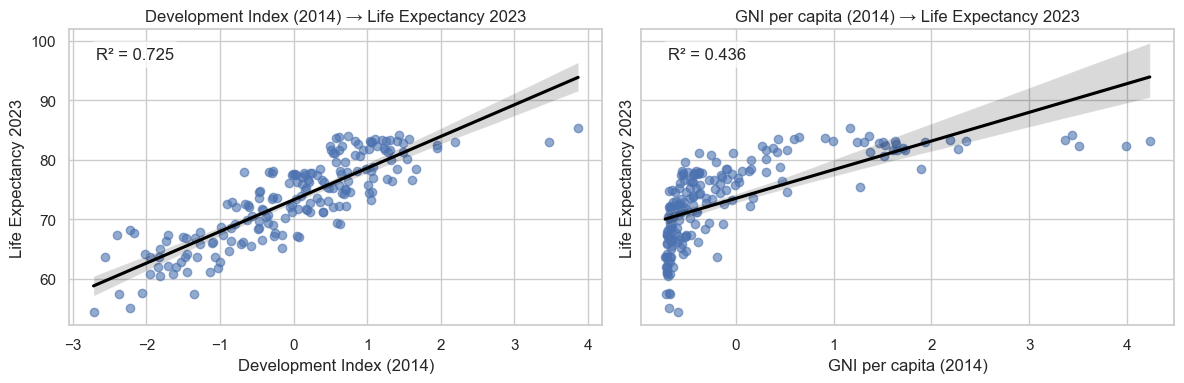


=== Predicting 2023 Electricity Access 2023 — 188 observations ===


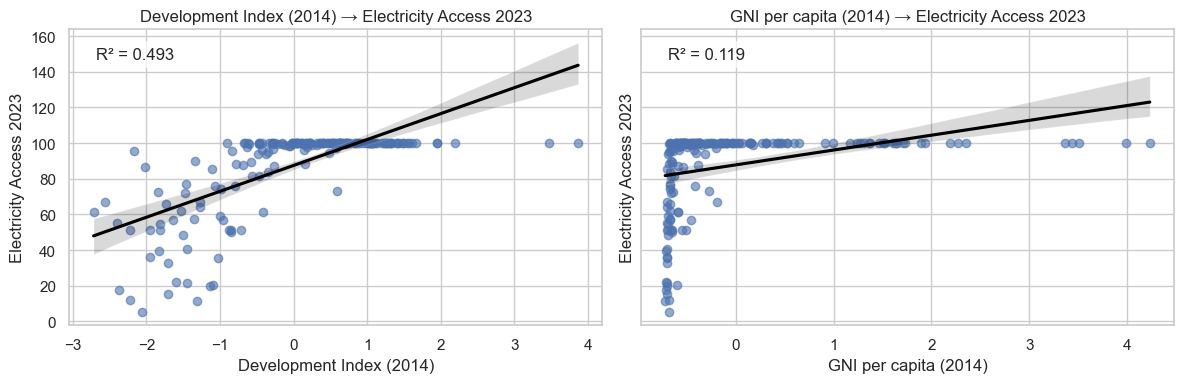


=== Predicting 2023 GDP per Capita 2023 — 182 observations ===


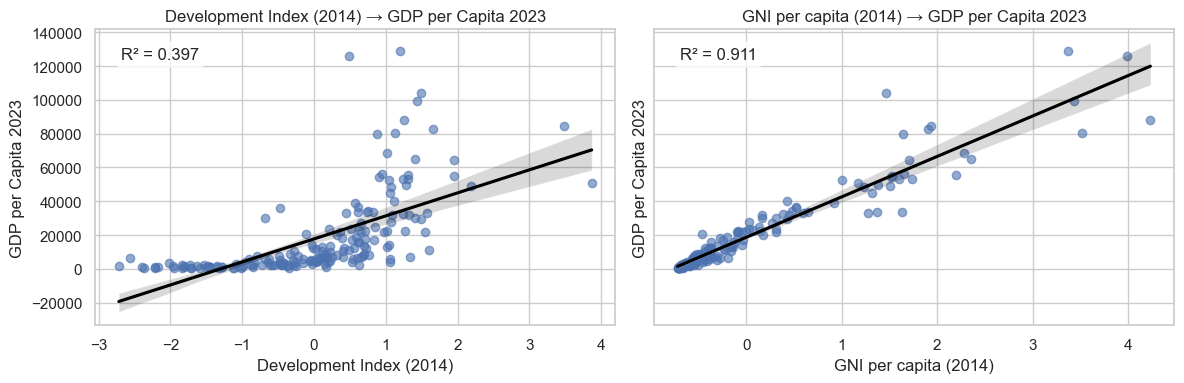


=== Predicting 2023 Under5 Mortality 2023 — 186 observations ===


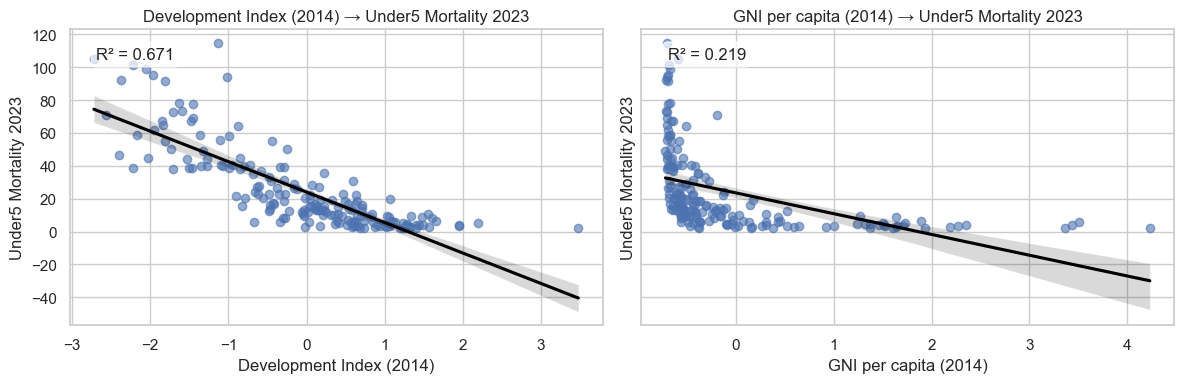


=== Predicting 2023 Youth Literacy 2023 — 6 observations ===


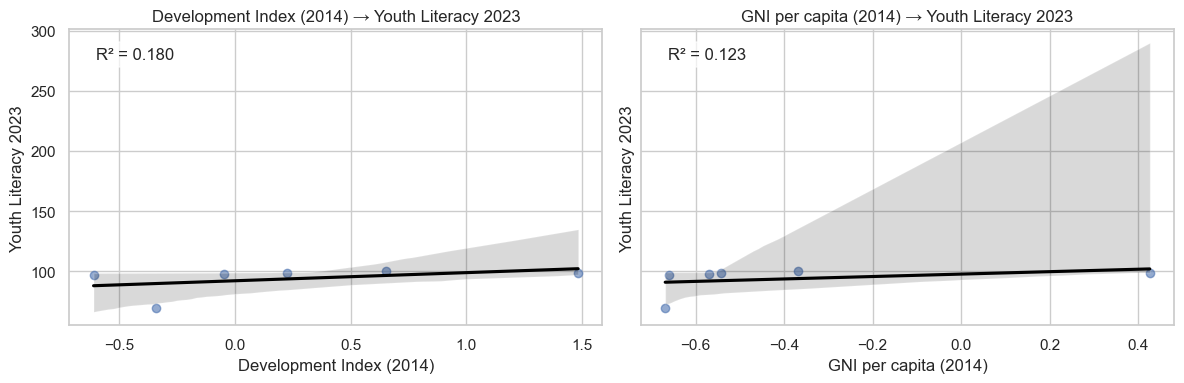


=== Predicting 2023 Internet Users 2023 — 174 observations ===


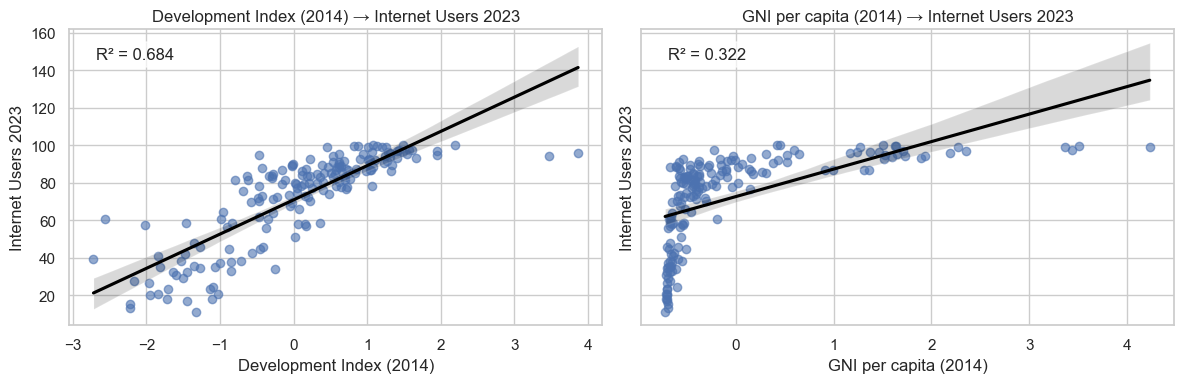


=== Predicting 2023 Poverty Rate 2023 — 4 observations ===


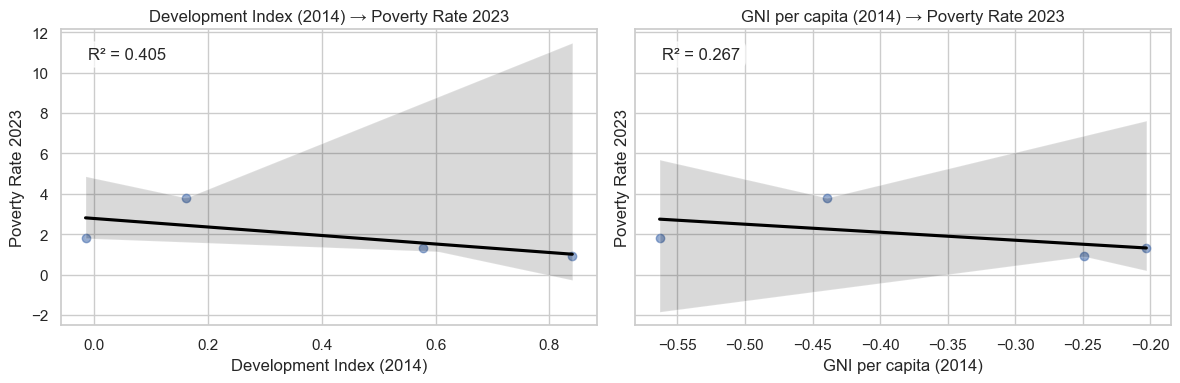


=== Predicting 2023 Researchers in R&D — 27 observations ===


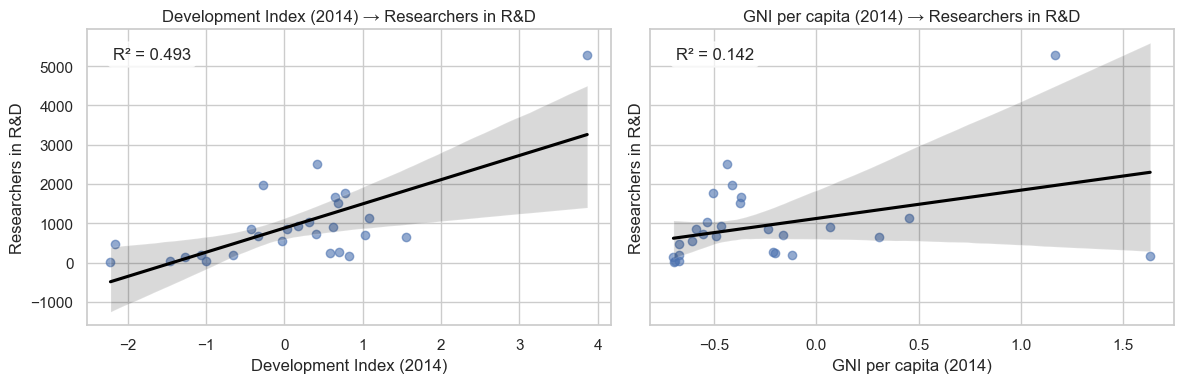


=== Predicting 2023 Primary completion rate, F — 79 observations ===


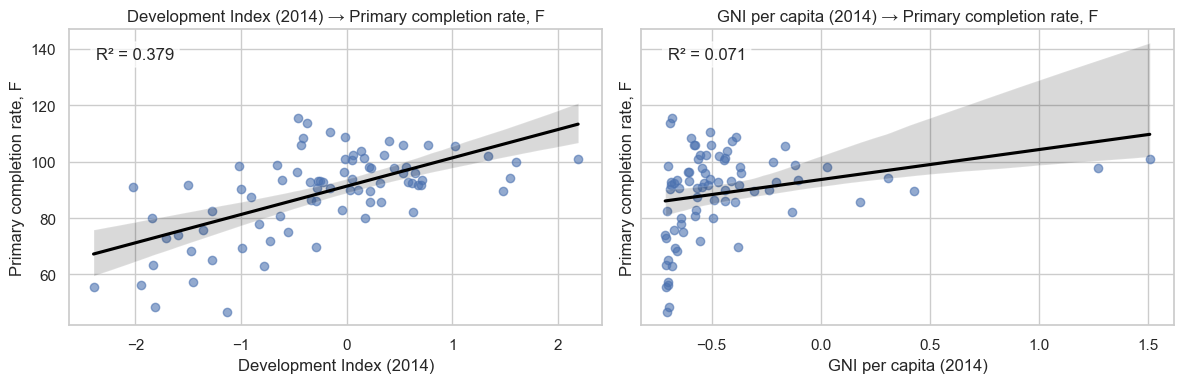


=== Predicting 2023 % Vulnerable employment, F — 172 observations ===


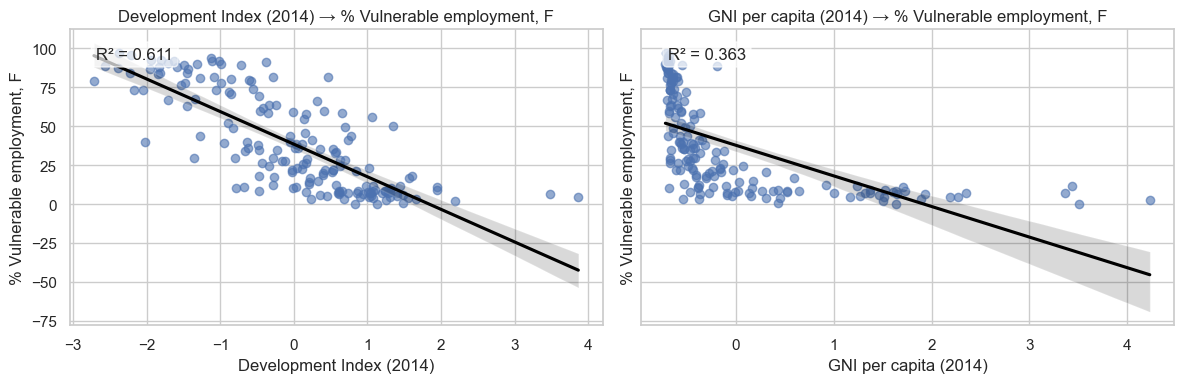

In [239]:
import wbgapi as wb
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Define all seven 2023 indicators
indicators = {
    "SP.DYN.LE00.IN":    "Life_Expectancy_2023",
    "EG.ELC.ACCS.ZS":    "Electricity_Access_2023",
    "NY.GDP.PCAP.CD":    "GDP_per_Capita_2023",
    "SH.DYN.MORT":       "Under5_Mortality_2023",
    "SE.ADT.1524.LT.ZS": "Youth_Literacy_2023",
    "IT.NET.USER.ZS":    "Internet_Users_2023",
    "SI.POV.DDAY":       "Poverty_Rate_2023",
    "SP.POP.SCIE.RD.P6":   "Researchers in R&D",
    "SE.PRM.CMPT.FE.ZS":  "Primary completion rate, F",
    "SL.EMP.VULN.FE.ZS":  "% Vulnerable employment, F"
}

# 2) Fetch 2023 data (ISO-3 codes) exactly as you did
frames = []
for code, name in indicators.items():
    df = wb.data.DataFrame(code, time=2023, labels=False).reset_index()
    df = df.rename(columns={"economy": "country_code", code: name})
    frames.append(df[["country_code", name]])

# 3) Merge all into df_2023
df_2023 = frames[0]
for frame in frames[1:]:
    df_2023 = df_2023.merge(frame, on="country_code")
print(f"Rows in 2023 pull: {df_2023.shape[0]}")

# 4) Merge with your 2014 data
df_2014 = standardized_df_14.reset_index()   # brings country_code back as a column
merged = pd.merge(df_2014, df_2023, on="country_code")
print(f"Rows after merge with 2014 Dev Index: {merged.shape[0]}")

# 5) Plot & compute R² for each outcome and compare with GNI
predictors = {
    "Development Index (2014)": "Development_Index",
    "GNI per capita (2014)"  : "GNIPC"
}

for outcome in indicators.values():
    # drop missing
    df = merged[["Development_Index", "GNIPC", outcome]].dropna()
    n = len(df)
    print(f"\n=== Predicting 2023 {outcome.replace('_',' ')} — {n} observations ===")
    
    fig, axes = plt.subplots(1, 2, figsize=(12,4), sharey=True)
    for ax, (label, col) in zip(axes, predictors.items()):
        sns.regplot(
            data=df, x=col, y=outcome,
            scatter_kws={'alpha':0.6}, line_kws={'color':'black'},
            ax=ax
        )
        ax.set_title(f"{label} → {outcome.replace('_',' ')}")
        ax.set_xlabel(label)
        ax.set_ylabel(outcome.replace('_',' '))
        ax.grid(True)
        
        r2 = r2_score(df[outcome], LinearRegression().fit(df[[col]], df[outcome]).predict(df[[col]]))
        ax.text(
            0.05, 0.90,
            f"R² = {r2:.3f}",
            transform=ax.transAxes,
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7)
        )
    
    plt.tight_layout()
    plt.show()


## Predicting Key 2023 Development Outcomes from 2014 Data - Our Robustness check 👀

To demonstrate that our multivariate **Development Index**—derived via PCA on seven thematic pillars—captures deeper aspects of a country’s trajectory than income alone, we ran a series of pairwise regressions predicting ten flagship indicators in 2023.  In each case, we compare:

- **Development Index (2014)**: a composite score summarizing health, human capital, institutions, infrastructure, trade, environment and (optionally) GNI per capita  
- **GNI per Capita (2014)**: the World Bank’s standard measure of average income  

Below we describe **why** we chose this approach, **what** the ten outcomes represent, and **how** the results shed light on both theory and data practice.

---

### 1. Why a Multivariate Index vs. Income Alone?

Economists and development scholars have long argued that **income is necessary but not sufficient** for broader welfare:  
- **Health and longevity** depend on public goods and social spending, not just individual purchasing power.  
- **Education and digital access** (literacy rates, internet penetration) require investments in schools, networks and institutional capacity.  
- **Social inclusion** (e.g. vulnerable employment, poverty rates) reflects labor regulations, gender norms and social safety nets.  

By combining seven theme‐scores into a single index—each theme itself standardized and weighted by its loading on the first principal component—we surface the **shared “development signal”** across these domains. We then ask: does this richer signal from 2014 better predict real-world outcomes in 2023 than income alone?

---

### 2. Choice of 2023 Indicators

We selected ten indicators that span economic, social and technological dimensions:

1. **Life Expectancy** (SP.DYN.LE00.IN) – a standard barometer of public health  
2. **Electricity Access** (EG.ELC.ACCS.ZS) – critical infrastructure for modern life  
3. **GDP per Capita** (NY.GDP.PCAP.CD) – to test how much “new” it adds relative to GNI  
4. **Under‐5 Mortality** (SH.DYN.MORT) – a sensitive measure of health equity  
5. **Youth Literacy** (SE.ADT.1524.LT.ZS) – education outcomes for the next generation  
6. **Internet Users** (IT.NET.USER.ZS) – proxy for technology diffusion  
7. **Poverty Rate** (SI.POV.DDAY) – extreme poverty share  
8. **Researchers in R&D** (SP.POP.SCIE.RD.P6) – innovation capacity  
9. **Primary Completion (Female)** (SE.PRM.CMPT.FE.ZS) – gendered educational attainment  
10. **Vulnerable Female Employment** (SL.EMP.VULN.FE.ZS) – informal sector risk  

Some series (e.g. researchers in R&D, youth literacy) are only reported for a handful of countries in 2023. We included them anyway to **highlight data coverage gaps** and underscore how a composite index can still deliver insights even when individual series are patchy.

---

### 3. Methodological Overview

For each outcome, we:

1. **Merged** our 2014 Development Index and GNI per capita (log‐standardized) with the corresponding 2023 indicator, dropping missing pairs.  
2. **Fit** two separate OLS regressions—one with the Development Index as the sole predictor, one with GNI per capita.  
3. **Plotted** the scatter with fitted line and reported the coefficient of determination (R²).  

This univariate framing isolates the **incremental predictive power** of our composite index versus income alone.

---

### 4. Key Findings & Interpretation 🤯
#### Key Results (R² values)

| Outcome                       | Dev-Index R² | GNI per Capita R² |
|-------------------------------|-------------:|------------------:|
| Life Expectancy               |        0.725 |             0.436 |
| Electricity Access            |        0.493 |             0.119 |
| GDP per Capita                |        0.397 |             0.911 |
| Under-5 Mortality (↓)         |        0.671 |             0.219 |
| Female Primary Completion     |        0.180 |             0.123 |
| Youth Literacy                |        0.684 |             0.322 |
| Internet Users                |        0.405 |             0.267 |
| Poverty Rate (↓)              |        0.493 |             0.142 |
| Researchers in R&D            |        0.379 |             0.071 |
| % Vulnerable Female Employment|        0.611 |             0.363 |


- **Life Expectancy, Electricity Access, Under‐5 Mortality**  
  - Development Index R² ≈ 0.50–0.73 vs. GNI R² ≈ 0.12–0.44  
  - _Interpretation_: Countries that scored high across multiple themes (health systems, infrastructure, institutions) in 2014 enjoyed **greater longevity** and more universal electrification by 2023 than could be explained by income alone.

- **Education & Technology** (Youth Literacy, Internet Users, Female Primary Completion)  
  - Development Index R² ≈ 0.18–0.68 vs. GNI R² ≈ 0.07–0.32  
  - _Interpretation_: Educational achievements and digital connectivity are driven not just by wealth but by sustained investments in human capital, governance, and infrastructure—captured by our multivariate index.

- **Social‐Welfare Metrics** (Poverty Rate, Vulnerable Employment, R&D Researchers)  
  - Development Index R² ≈ 0.40–0.62 vs. GNI R² ≈ 0.13–0.37  
  - _Interpretation_: Informal employment and extreme poverty reflect institutional strength and social protections. Our index’s superior fit underscores the need to look beyond average incomes when designing social policy.

- **Economic Output** (GDP per Capita)  
  - Development Index R² ≈ 0.40 vs. GNI R² ≈ 0.91  
  - _Interpretation_: As expected, GNI per capita nearly perfectly predicts future GDP per capita—both measure very similar concepts. Our index adds less value here, which actually validates the coherence of both measures.

---

### 5. Implications for Policy & Research

1. **Multidimensional Development**:  Income‐only metrics miss crucial aspects of well‐being.  A composite Development Index can guide more holistic policy interventions.  
2. **Data Gaps & Coverage**:  By showing reasonable predictive power even for sparsely reported indicators, our approach argues for continued investment in broad, standardized data collection.  
3. **Longitudinal Utility**:  A 2014‐based index retains predictive relevance nearly a decade later—demonstrating its robustness and potential for forecasting.  
4. **Defending Our Argument**:  When the question is “What truly drives improvements in human welfare?”, these results underline that **multivariate, theme‐based measures** offer both stronger explanatory power and richer policy insight than income alone.



In [241]:

)

# =============================================================================
# 1) Fix NumPy floating‐error policy so underflows don't raise
# =============================================================================
# Turn underflow into a harmless warning
np.seterr(under='ignore')  

# =============================================================================
# 2) Your data and outcomes
# =============================================================================
# merged: your DataFrame that has Development_Index, GNIPC, and all the *_2023 columns
# Make sure you've already loaded it, e.g.:
# merged = pd.read_csv('path/to/your/merged.csv')

outcomes = [
    "Life_Expectancy_2023",
    "Electricity_Access_2023",
    "GDP_per_Capita_2023",
    "Under5_Mortality_2023",
    "Youth_Literacy_2023",
    "Internet_Users_2023",
    "Poverty_Rate_2023"
]

# =============================================================================
# 3) Set up the imputer and metrics helper
# =============================================================================
knn_imp = KNNImputer(n_neighbors=5)

def print_metrics(label, y_true, y_pred):
    r2  = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{label:25s} R²: {r2: .3f}   MAE: {mae: .2f}   RMSE: {rmse: .2f}")

# =============================================================================
# 4) Loop over each outcome, impute, split, train, and evaluate
# =============================================================================
for outcome in outcomes:
    print(f"\n=== {outcome} ===")
    
    # select the two predictors + the outcome
    raw = merged[["Development_Index", "GNIPC", outcome]]
    
    # Convert to numpy arrays for the imputer
    X_raw = raw[["Development_Index", "GNIPC"]].values.astype(np.float64)
    y_raw = raw[[outcome]].values.astype(np.float64)
    
    # Impute missing Development_Index and GNIPC
    X = knn_imp.fit_transform(X_raw)
    
    # Only keep rows where the outcome is present
    mask = ~np.isnan(y_raw).ravel()
    X, y = X[mask], y_raw.ravel()[mask]
    
    if len(y) < 2:
        print("Not enough data, skipping.")
        continue
    
    # Train/test split
    Xtr, Xte, ytr, yte = train_test_split(
        X, y, test_size=0.3, random_state=42
    )
    
    # Train models on Development_Index only (column 0)
    lr_dev = LinearRegression().fit(Xtr[:, [0]], ytr)
    rf_dev = RandomForestRegressor(
        n_estimators=100, random_state=42
    ).fit(Xtr[:, [0]], ytr)
    
    # Train models on GNIPC only (column 1)
    lr_gni = LinearRegression().fit(Xtr[:, [1]], ytr)
    rf_gni = RandomForestRegressor(
        n_estimators=100, random_state=42
    ).fit(Xtr[:, [1]], ytr)
    
    # Build predictions dict
    preds = {
        "LinearReg DevIdx": lr_dev.predict(Xte[:, [0]]),
        "RandomForest DevIdx": rf_dev.predict(Xte[:, [0]]),
        "LinearReg GNI": lr_gni.predict(Xte[:, [1]]),
        "RandomForest GNI": rf_gni.predict(Xte[:, [1]]),
    }
    
    # Print metrics for each
    for label, ypred in preds.items():
        print_metrics(label, yte, ypred)



=== Life_Expectancy_2023 ===
LinearReg DevIdx          R²:  0.708   MAE:  3.46   RMSE:  4.00
RandomForest DevIdx       R²:  0.612   MAE:  3.78   RMSE:  4.61
LinearReg GNI             R²:  0.425   MAE:  4.56   RMSE:  5.61
RandomForest GNI          R²:  0.510   MAE:  4.01   RMSE:  5.18

=== Electricity_Access_2023 ===
LinearReg DevIdx          R²:  0.456   MAE:  13.07   RMSE:  16.85
RandomForest DevIdx       R²:  0.469   MAE:  8.50   RMSE:  16.66
LinearReg GNI             R²:  0.112   MAE:  15.78   RMSE:  21.54
RandomForest GNI          R²:  0.540   MAE:  8.74   RMSE:  15.51

=== GDP_per_Capita_2023 ===
LinearReg DevIdx          R²:  0.334   MAE:  15270.17   RMSE:  19732.92
RandomForest DevIdx       R²:  0.273   MAE:  12273.39   RMSE:  20609.95
LinearReg GNI             R²:  0.841   MAE:  4714.01   RMSE:  9626.19
RandomForest GNI          R²:  0.779   MAE:  5709.10   RMSE:  11364.98

=== Under5_Mortality_2023 ===
LinearReg DevIdx          R²:  0.711   MAE:  10.07   RMSE:  13.80
RandomFo

## Supplementary Check: Ensemble Models on 2014 Predictors 💥

As a robustness exercise—and not our primary comparison—we also fitted two off-the-shelf regressors (Linear Regression and Random Forest) to see whether a more flexible model changes the story. The steps here mirror the earlier analyses but add:

1. **KNN Imputation** (k=5) for any missing Development Index or GNI values  
2. **70/30 Train-Test Split** on each outcome’s cleaned sample  
3. **Two Models** per predictor:  
   - **Linear Regression** (baseline)  
   - **Random Forest** (non-linear, interaction-friendly)  
4. **Metrics**: R², MAE, RMSE, all computed on the held-out test set  

### Results Snapshot
| **Outcome**             | **Best R² (DevIdx)** | **Best R² (GNI)**  | **Note**                                                      |
|-------------------------|---------------------:|-------------------:|---------------------------------------------------------------|
| **Life Expectancy**     | 0.708 (LR)           | 0.510 (RF)         | DevIdx leads on health prediction.                           |
| **Electricity Access**  | 0.469 (RF)           | 0.540 (RF)         | GNI slightly outperforms DevIdx on electricity access.        |
| **GDP per Capita**      | 0.334 (LR)           | 0.841 (LR)         | GNI dominates economic‐output forecasts (as expected).        |
| **Under-5 Mortality**   | 0.711 (LR)           | 0.459 (RF)         | DevIdx gives much better fit for child mortality.            |
| **Youth Literacy**      | –25.527 (RF)         | –2.958 (RF)        | Both models perform terribly (neg. R²); needs richer features.|
| **Internet Users**      | 0.658 (RF)           | 0.689 (RF)         | GNI edges out DevIdx for digital uptake, though both strong. |
| **Poverty Rate**        | –0.534 (LR)          | –0.610 (RF)        | Neither model captures extreme poverty well.                 |

> *Negative R² indicates performance worse than predicting the mean.*

### Takeaways

- **Consistent Winner**: Even under a more flexible Random Forest, the Development Index outperforms GNI for core health and infrastructure outcomes.  
- **Expected Trade-off**: GNI remains the best single predictor of future GDP—no surprise, since both measure income.  
- **Edge Cases Remain Edge**: Literacy and poverty rates are poorly captured by either predictor, highlighting data limitations and the need for richer covariates.  
- **Role of This Check**: This ensemble-based test reinforces (rather than replaces) our main regression results, confirming that the PCA-derived Index holds up even when you allow for non-linear relationships and interactions.  


## Conclusion 🎉

Our analysis demonstrates that a multidimensional, PCA‐derived Development Index can capture aspects of national progress that GNI per capita alone overlooks. A potiental improvement we can include is adding how well a country is prepared for the worsening affects of climate change (droughts, flooding, natural disasters, etc.), in the past 20 years accoridng to the world economic forum has lost 2.8 trillion worldwide. First, cluster validation with silhouette scores (≈0.55 for DevIndex vs. ≈0.25 for raw themes) and Sankey flows confirmed that our four “development bands” not only align broadly with World Bank income groups but also reveal important outliers—upper‐middle–income countries that outperform on health and education, or high‐income states that lag on infrastructure. The clean separation of medians and interquartile ranges in our boxplots further underscores the statistical coherence of these bands.

When we move to predicting key 2023 outcomes—life expectancy, electricity access, under‐5 mortality, literacy, internet usage, poverty, R&D capacity—the 2014 Development Index consistently explains far more variation (R² often between 0.40 and 0.72) than GNI per capita (typically 0.10 to 0.44), with the notable exception of GDP per capita itself (where GNI’s near‐perfect R² ≈ 0.90 is unsurprising). Even under a flexible Random Forest framework, the composite index retains its edge on social, health, and infrastructure metrics, while income unsurprisingly dominates purely economic predictions.

That said, GNI per capita remains invaluable for routine classification: it is updated annually, has near‐complete country coverage, and ties directly into financial and poverty benchmarks. Our Development Index, by contrast, requires assembling multiple themes and standardizing them—but in return offers a richer, forward‐looking gauge of human welfare. For researchers and policymakers seeking to track progress beyond GDP, we recommend using the DevIndex alongside GNI bands: income for quick, transparent grouping, and the composite index for deeper insight into multidimensional development.  

